## Μηχανική Μάθηση και Αναγνώριση Προτύπων - Εργασία 2

### **Ορφέας Τσουράκης 1115201700175**

## **Ερώτημα 1:  Logistic regression & Overfitting**

*Χρησιμοποιώντας python και βιβλιοθήκες της, να σχεδιάσετε τη σιγμοειδή συνάρτηση
$f(x) = 1/(1 + e^{-wx})$ ως προς $x \in [-10, 10]$ για 3 διαφορετικές τιμές της παραμέτρου $w = 1$,
$w = 5$ και $w = 100$*.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


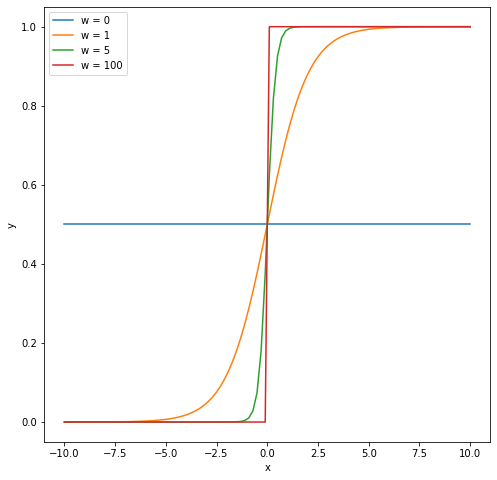

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def createLogisticModel(w):
  return lambda x: 1 / (1 + np.exp(-w * x))

def plotModels(x, params):
  plt.figure(figsize = (8, 8))
  for w in params:
    f = createLogisticModel(w)
    y = f(x)
    plt.plot(x, y, label = f'w = {w}')
  plt.xlabel('x') 
  plt.ylabel('y') 
  plt.legend()
  plt.show()



x = np.linspace(-10, 10, 100)
params = [0, 1, 5, 100]
plotModels(x, params)

α) *Με βάση αυτά τα διαγράμματα, να εξηγήσετε για ποιον λόγο η λογιστική
παλινδρόμηση (logistic regression) εμφανίζει συμπεριφορά overfitting για μεγάλες τιμές της
παραμέτρου w.*

Πρακτικά οι **μεγάλες τιμές της παραμέτρου w** οδηγούν σε ένα μοντέλο το οποίο **διαχωρίζει τις δύο κλάσεις** μεταξύ τους με **πάρα πολύ μεγάλη σιγουριά/πιθανότητα**, δηλαδή πιθανότητα που προσεγγίζει **την τιμή 0 ή την τιμή 1** σε σχεδόν κάθε αρνητική ή θετική πρόβλεψη αντίστοιχα (όπως φαίνεται και στα παραπάνω γραφήματα για τις μεγαλύτερες τιμές του w, για τα περίσσότερα αρνητικά και θετικά x αντίστοιχα, λόγω της πιο απότομης κλίσης της καμπύλης). Διαισθητικά **ένα τέτοιο "τέλειο" μοντέλο** μπορεί εύκολα να δημιουργηθεί από **περιορισμένο σύνολο δεδομένων εκπαίδευσης** οπότε είναι σχεδόν **απίθανο να μπορεί να γενικεύσει** σε άγνωστα δεδομένα. Πιο συγκεκριμένα ένα σύνολο εκπαίδευσης το οποίο είναι **τέλεια διαχωρίσιμο** ως προς τις κλάσεις του δηλαδή υπάρχει τέλειος διαχωρισμός μεταξύ των κλάσεων χωρίς επικάλυψη των δεδομένων τους μπορεί εύκολα να οδηγήσει στην εκτίμηση ενός τέτοιου μοντέλου όπου $w → ∞$ ώστε να **μηδενιστεί το σφάλμα εκπαίδευσης** (εμπειρικό ρίσκο) το οποίο βέβαια **δεν είναι καλός δείκτης του πραγματικού ρίσκου** όπως είναι γνωστό και από την θεωρία (και όπως αυτό φαίνεται και στα γραφήματα παρακάτω). Αν υπήρχε όμως **έστω και ένα δεδομένο εκπαίδευσης** το οποίο θα δημιουργούσε επικάλυψη των κλάσεων τότε οι κλάσεις δεν θα μπορούσαν να διαχωριστούν τέλεια οπότε $w << ∞$ με πιθανότητες οι οποίες δεν προσεγγίζουν όλες κατά πολύ το 0 ή το 1. Έτσι, είναι φανερό ότι υπάρχει **αστάθεια** μιας και **μικρές αλλαγές στο σύνολο εκπαίδευσης** μπορούν να **επηρεάσουν αρκετά τις εξόδους/προβλέψεις** πιθανοτήτων του εκτιμητή ώστε να αποκλίνουν από την μέση πρόβλεψη. Η αστάθεια αυτή σχετίζεται με το **variance** το οποίο αν είναι αρκετά μεγάλο όπως στην περίπτωση όπου $w → ∞$ (όπου το μοντέλο δίνει πάντα πιθανότητες 0 ή 1 οι οποίες απέχουν από τις μέσες προβλέψεις) τότε υπάρχει **overfitting**. **Άρα όσο μεγαλώνει η τιμή του w τόσο εγκυμονεί ο κίνδυνος του overfitting**

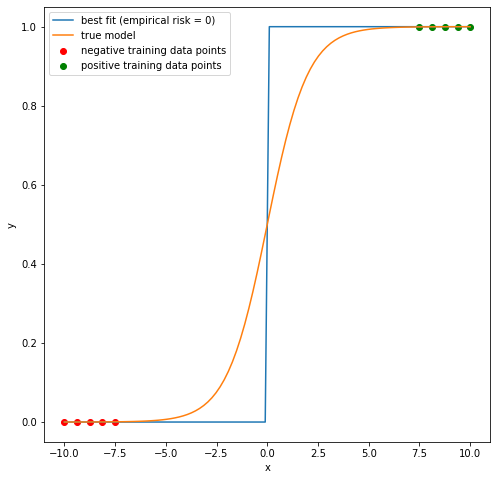

In [ ]:
negative_datapoints = (np.linspace(-10, -7.5, 5), np.zeros(5))
positive_datapoints = (np.linspace(7.5, 10, 5), np.ones(5))

true_model = createLogisticModel(1)
best_fit = createLogisticModel(float('inf'))

plt.figure(figsize = (8, 8))
y = best_fit(x)
plt.plot(x, y, label = 'best fit (empirical risk = 0)')
y = true_model(x)
plt.plot(x, y, label = 'true model')
plt.scatter(negative_datapoints[0], negative_datapoints[1], c = 'red', label = 'negative training data points')
plt.scatter(positive_datapoints[0], positive_datapoints[1], c = 'green', label = 'positive training data points')

plt.xlabel('x')
plt.ylabel('y') 
plt.legend()
plt.show()

Στο παραπάνω διάγραμμα παρουσιάζεται η περίπτωση όπου τα δεδομένα εκπαίδευσης που έχουν συλλεχθεί είναι τέλεια διαχωρίσιμα με αποτέλεσμα το μοντέλο το οποίο εκπαιδεύτηκε να απέχει αρκετά από το πραγματικό μοντέλο κάνοντας εμφανές το πρόβλημα του overfitting

β) *Θα βοηθούσε η κανονικοποίηση (regularization) της παραμέτρου w στην
αντιμετώπιση του overfitting; Αν ναι, ποια συνάρτηση κανονικοποίησης (regularization
function) θα χρησιμοποιούσατε και γιατί;*

Είναι αρκετά φανερό πως θέτοντας περιορισμό για το μέγεθος της παραμέτρου w θα αποφευχθούν οι περιπτώσεις όπου το w γίνεται **πολύ μεγάλο** και άρα η **κλίση της καμπύλης δεν θα είναι τόσο απότομη** ενώ παράλληλα θα έχει επιτευχθεί **γενίκευση** ακόμα και στην ακραία περίπτωση που τα δεδομένα εκπαίδευσης είναι **διαχωρίσιμα** και υπήρχε το πρόβλημα πως $w → ∞$. Με αυτόν τον τρόπο επιτυγχάνεται **να αυξηθεί το εμπειρικό ρίσκο** έχοντας πετύχει όμως **μικρότερο σφάλμα γενίκευσης** το οποίο είναι και το ζητούμενο.

Η συνάρτηση κανονικοποίησης που θα ήταν η **πιο κατάλληλη** για την περίπτωση αυτή, η οποία περιλαμβάνει μόνο μια παράμετρο w, θα ήταν η **l2-norm** η οποία **δεν θα επιτρέψει να μηδενιστεί** αυτή η παράμετρος όπως θα έκανε η l1-norm. Η **l1-norm** δηλαδή για κάποιο μεγάλο συντελεστή κανονικοποίησης **μηδενίζει** την παράμετρο w και αυτό έχει ως αποτέλεσμα να προκύψει ένα **εντελώς τυχαίο μοντέλο-ταξινομητής** που να δίνει **πιθανότητα 0.5** για κάθε δεδομένο (όπως φαίνεται στα αρχικά γραφήματα για $w = 0$). Πιθανώς η l1-norm να αποτελούσε έναν καλό regularizer για την περίπτωση που υπήρχαν και άλλες παράμετροι ώστε να επιτευχθεί **feature selection** και έτσι να αποφευχθεί και το overfitting για αντίστοιχο λόγο με παραπάνω, αλλά τώρα λόγω των πολλών διαστάσεων. Παρόλα αυτά η l1-norm θα πρέπει να εφαρμόζεται **με επιφύλαξη** διότι μπορεί να προκύψει **κίνδυνος αστάθειας** π.χ λόγω συγγραμικότητας.

## **Ερώτημα 2:  Ridge regression**

α) *Δίνεται το πρόβλημα βελτιστοποίησης του μοντέλου ridge regression:*

$$\mathbf{w^*} = argmin_\mathbf{w}\sum_{i=1}^{N}(y_i − \mathbf{w}^T \mathbf{x}_i)^2+ λ\sum_{k=1}^{K}{w_k^2}$$

*Να εκφράσετε το παραπάνω πρόβλημα βελτιστοποίησης ως πρόβλημα ελαχιστοποίησης
ευκλείδειων αποστάσεων και να βρείτε αναλυτικά, βήμα προς βήμα, τη λύση του σε κλειστή
μορφή. Να προσδιορίσετε το μέγεθος όλων των διανυσμάτων/πινάκων που θα
χρησιμοποιήσετε.*

Χρήσιμες ιδιότητες **διανυσμάτων κολώνας** (column vectors) και **πινάκων** (matrices): <br> <br>
$$
\begin{align*}
&\mathbf{x}^{\top^\top} = \mathbf{x}, \quad \mathbf{X}^{\top^\top} = \mathbf{X}\tag{i}  \\~\\
&\mathbf{X} = \mathbf{X}^{\top} ⇔ \mathbf{X} \text{ is symmetric}\tag{ii}  \\~\\
&\left(\mathbf{x} + \mathbf{y}\right)^\top = \mathbf{x}^\top + \mathbf{y}^\top \tag{iii}  \\~\\
&\left(\mathbf{Xy}\right)^\top = \mathbf{y}^\top\mathbf{X}^\top, \quad \left(\mathbf{XY}\right)^\top = \mathbf{Y}^\top\mathbf{X}^\top\tag{iv}  \\~\\
&\mathbf{x}^\top \mathbf{y} = \mathbf{y}^\top\mathbf{x} \tag{v}  \\~\\
&\|\mathbf{x}\|_2^2 = \mathbf{x}^\top\mathbf{x} \tag{vi}  \\~\\
&\frac {\partial \mathbf {y} ^{\top }\mathbf {x} }{\partial \mathbf {x} }=\frac {\partial \mathbf {x} ^{\top }\mathbf {y} }{\partial \mathbf {x} } = \mathbf{y} \tag{vii} \\~\\
&\frac {\partial \mathbf {w} ^{\top }\mathbf {w} }{\partial \mathbf {x} } = 2\mathbf{w} \tag{viii} \\~\\
&\frac {\partial \mathbf{x}^\top\mathbf{Ax} }{\partial \mathbf {x} } = 2\mathbf {Ax} \quad \text{if } \mathbf{A} \text{ is symmetric}  \tag{ix}\\~\\
\end{align*}
$$ <br>
*H $(ix)$ αποτελεί παράγωγο **τετραγωνικής μορφής** η οποία αποδείχθηκε αναλυτικά στην Εργασία 1*

Έστω $λ \in \mathbb{R_+}$ και

$$
\mathbf{Χ} = \begin{bmatrix}
    x_{11} & x_{12} & … & x_{1K-1} & x_{1K} \\
    x_{21} & x_{22} & … & x_{2K-1} & x_{2K} \\
    &  & \vdots & \\
    x_{N-11} & x_{N-12} & … & x_{N-1K-1} & x_{N-1K}\\
    x_{N1} & x_{N2} & … & x_{NK-1} & x_{NK}
\end{bmatrix} \in \mathbb{R}^{N \times K}, \quad  
\mathbf{y} = \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots\\
    y_{N-1} \\
    y_{N}
\end{bmatrix} \in \mathbb{R}^{N}, \quad 
\mathbf{w} = \begin{bmatrix}
    w_1 \\
    w_2 \\
    \vdots\\
    w_{K-1} \\
    w_{K}
\end{bmatrix} \in \mathbb{R}^{K}
$$ <br> <br>

Εφόσον ο πρώτος όρος της συνάρτησης βελτιστοποίησης φαίνεται να περιέχει άθροισμα τετραγώνων των στοιχείων ενός διανύσματος χρησιμοποιώντας την $L_2$ νόρμα μπορεί να γραφτεί υπό την μορφή πινάκων με τον εξής τρόπο:

$$ \begin{align*}
& \sum_{i=1}^{N}(y_i − \mathbf{w}^T \mathbf{x}_i)^2 = \left\Vert 
\begin{bmatrix}
y_1\\
y_2\\
\\
\vdots\\
\\
y_Ν
\end{bmatrix} -
\begin{bmatrix}
w_1x_{11} & + &w_2x_{12} & + & ... & + & w_Kx_{1K}\\
w_1x_{21} & + &w_2x_{22} & + & ... & + & w_Kx_{2K}\\
\\
 & & & \vdots \\
\\
w_1x_{N1} & + &w_2x_{N2} & + & ... & + & w_nx_{NK}\\
\end{bmatrix}
\right\Vert^2  \quad \Leftrightarrow \\~\\
&\sum_{i=1}^{N}(y_i − \mathbf{w}^T \mathbf{x}_i)^2 =\left\Vert 
\begin{bmatrix}
y_1\\
y_2\\
\\
\vdots\\
\\
y_Ν
\end{bmatrix} -
\begin{bmatrix}
x_{11} & x_{12} &  ... &  x_{1K}\\
x_{21} & x_{22} &  ... &  x_{2K}\\
\\
 & &  \vdots \\
\\
x_{N1} & x_{m2} &  ... & x_{NK}\\
\end{bmatrix}
\begin{bmatrix}
w_1\\
w_2\\
\\
\vdots \\
\\
w_K
\end{bmatrix}
\right\Vert^2
\end{align*}
$$ <br> <br>

Οπότε  

$$\sum_{i=1}^{N}(y_i − \mathbf{w}^T \mathbf{x}_i)^2 = \|\mathbf{y} - \mathbf{Xw}\|_2^2 \tag{1}$$

Ομοίως και ο δεύτερος όρος της συνάρτησης βελτιστοποίησης επειδή αποτελεί άθροισμα τετραγώνων των στοιχείων του διανύσματος $\mathbf{w}$ μπορεί να γραφτεί ως  εξής:

$$λ\sum_{k=1}^{K}{w_k^2} = λ\|\mathbf{w}\|_2^2 \tag{2}$$

Άρα από $(1)$ και $(2)$ το πρόβλημα του ridge regression μπορεί να γραφτεί ισοδύναμα με τον εξής τρόπο ως ένα πρόβλημα βελτιστοποίησης ευκλείδειων αποστάσεων: 

$$\mathbf{w^*} =  argmin_\mathbf{w}\|\mathbf{y} - \mathbf{Xw}\|_2^2 + λ\|\mathbf{w}\|_2^2$$ <br><br>


Σε πρώτο βήμα θα πρέπει να βρεθεί η μερική παράγωγος της $l(\mathbf{w}) = \|\mathbf{y} - \mathbf{Xw}\|_2^2 + λ\|\mathbf{w}\|_2^2$ ως προς το διάνυσμα $\mathbf{w}$ <br><br>

Αναλύοντας την $l(\mathbf{w})$ εφαρμόζοντας με την σειρά τις ιδιότητες $(vi)$, $(iii)$, $(iv)$ και την επιμεριστική ιδιότητα μπορεί να γραφτεί ως εξής: <br><br>

$$
\begin{align*}
&l(\mathbf{w}) = (\mathbf{y} - \mathbf{Xw})^T(\mathbf{y} - \mathbf{Xw}) + λ\mathbf{w}^T\mathbf{w} ⇔ \\
&l(\mathbf{w}) = (\mathbf{y}^T - (\mathbf{Xw})^T)(\mathbf{y} - \mathbf{Xw}) + λ\mathbf{w}^T\mathbf{w} ⇔ \\
&l(\mathbf{w}) = (\mathbf{y}^T - \mathbf{w}^T\mathbf{X}^T)(\mathbf{y} - \mathbf{Xw}) + λ\mathbf{w}^T\mathbf{w}⇔ \\
&l(\mathbf{w}) = \mathbf{y}^T\mathbf{y}-\mathbf{y}^T\mathbf{Xw} - \mathbf{w}^T\mathbf{X}^T\mathbf{y} + \mathbf{w}^T\mathbf{X}^T\mathbf{Xw} + λ\mathbf{w}^T\mathbf{w} 
\tag{3}
\end{align*}
$$ <br>

Από ιδιότητες $(v)$ και $(iv)$ προκύπτει $\mathbf{y}^T\mathbf{Xw} = (\mathbf{Xw})^Τ\mathbf{y} = \mathbf{w}^T\mathbf{X}^T\mathbf{y}$ και έτσι η $(1)$ γράφεται ως εξής: <br><br>

$$l(\mathbf{w}) = \mathbf{y}^T\mathbf{y} - 2\mathbf{y}^T\mathbf{Xw} + \mathbf{w}^T\mathbf{X}^T\mathbf{Xw} + λ\mathbf{w}^T\mathbf{w} 
\tag{4}$$ <br>

Η $l(\mathbf{w})$ αποτελείται από τους εξής όρους: 
- $f(\mathbf{w}) = \mathbf{y}^T\mathbf{y}$
- $g(\mathbf{w}) = 2\mathbf{y}^T\mathbf{Xw} = 2\left(\mathbf{X}^T\mathbf{y}\right)^T \mathbf{w}$ (ιδιότητες $(iv)$ και $(i))$ 
- $h(\mathbf{w}) = \mathbf{w}^T\mathbf{X}^T\mathbf{Xw}$
- $p(\mathbf{w}) = λ\mathbf{w}^T\mathbf{w}$

Οπότε λόγω της γραμμικής ιδιότητας της μερικής παραγώγου για τον υπολογισμό της $∇_\mathbf{w}{l(\mathbf{w})}$ θα υπολογιστούν οι επιμέρους μερικές παράγωγοι ξεχωριστά για κάθε όρο:

- Επίλυση με ιδιότητες
  - $∇_\mathbf{w}{f(\mathbf{w})} = 0$ (δεν εξαρτάται απο το διάνυσμα $\mathbf{w}$)
  - $∇_\mathbf{w}{g(\mathbf{w})} = 2\mathbf{X}^T\mathbf{y}$ (ιδιότητα $(vii)$)
  - $∇_\mathbf{w}{h(\mathbf{w})} = 2\mathbf{X}^T\mathbf{X}\mathbf{w}$ (ιδιότητα $(ix)$) αφού $(\mathbf{X}^T \mathbf{X})^Τ = \mathbf{X}^T \mathbf{X}^{Τ^Τ} = \mathbf{X}^T \mathbf{X} $ (ιδιότητες $(iv)$ και $(i))$ δηλαδή $\mathbf{X}^T \mathbf{X} $ συμμετρικός (ιδιότητα $(ii)$)
  - $∇_\mathbf{w}{p(\mathbf{w})} = 2λ\mathbf{w}$ (ιδιότητα $(viii)$) 

<br>

- Επαλήθευση με αναλυτική επίλυση

  *Η εύρεση της $∇_\mathbf{w}{g(\mathbf{w})}$ και της $∇_\mathbf{w}{h(\mathbf{w})}$ βασίστηκε κυρίως στις ιδιότητες $(vii)$ και $(ix)$ αντίστοιχα οι οποίες αποδείχθηκαν αναλυτικά στο υποερώτημα $2.1$ της Εργασίας 1 οπότε δεν θα παρουσιαστούν για λόγους απλότητας. Επιπλέον η $∇_\mathbf{w}{f(\mathbf{w})}$ έχει τετριμμένη απόδειξη οπότε θα παρουσιαστεί μόνο η λύση της $∇_\mathbf{w}{p(\mathbf{w})}$*

  Η $p(\mathbf{w})$ αποτελεί εσωτερικό γινόμενο (dot product) και γράφεται ως εξής: <br>
  $$p(\mathbf{w}) = λ\sum_{i=1}^{K}w_iw_i = \sum_{i=1}^{K}λw_i^2$$ <br>
  Για την εύρεση της $\nabla_\mathbf{w}p(\mathbf{w})$ αρκεί μόνο να υπολογιστεί η παράγωγος της ποσότητας $\sum_{i=1}^{K}λw_i^2$ ως προς κάθε $w_k$ <br> 
  Πρακτικά ο μη σταθερος όρος που λαμβάνεται υπόψη από την παράγωγο προκύπτει από το φιξάρισμα του $i$ στην τιμή $k$ <br><br>
  $$\frac{\partial p(\mathbf {w}) }{\partial w_k} = \frac{d}{dw_k}\sum_{i=1}^{d}λw_i^2 = 2λw_k $$
  Έτσι λοιπόν προκύπτει ξανά η $∇_\mathbf{w}{p(\mathbf{w})}$ ως εξής: $$ \nabla_\mathbf{w}p(\mathbf{w}) =  
  \begin{bmatrix}
    \frac{\partial p(\mathbf {w}) }{\partial w_1} \\
    \frac{\partial p(\mathbf {w}) }{\partial w_2} \\
    \vdots\\
    \frac{\partial p(\mathbf {w}) }{\partial w_{K-1}} \\
    \frac{\partial p(\mathbf {w}) }{\partial w_K}
  \end{bmatrix} = \begin{bmatrix}
    2λw_1 \\
    2λw_2  \\
    \vdots\\
    2λw_{K-1}\\
    2λw_{K}
  \end{bmatrix}= 2λ\begin{bmatrix}
    w_1 \\
    w_2  \\
    \vdots\\
    w_{K-1}\\
    w_{K}
  \end{bmatrix} = 2λ\mathbf{w} $$ <br>


Από τα παραπάνω προκύπτει: 
$$∇_\mathbf{w}{l(\mathbf{w})} = ∇_\mathbf{w}{f(\mathbf{w})} - ∇_\mathbf{w}{g(\mathbf{w})} + ∇_\mathbf{w}{h(\mathbf{w})} + ∇_\mathbf{w}{p(\mathbf{w})} \tag{5}$$ <br>
Και αντικαθιστώντας τις μερικές παραγώγους στην $(5)$: <br><br>
$$
∇_\mathbf{w}{l(\mathbf{w})} = 0 - 2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\mathbf{w} + 2λ\mathbf{w}= 2\mathbf{X}^T\mathbf{X}\mathbf{w} - 2\mathbf{X}^T\mathbf{y}+ 2λ\mathbf{w} \tag{4}
$$ <br>
Τέλος, κάνοντας παραγοντοποίηση ως προς $\mathbf{w}$ προκύπτει:
$$∇_\mathbf{w}{l(\mathbf{w})} = 2(\mathbf{X}^T\mathbf{X} + λ \mathbf{I})\mathbf{w} - 2\mathbf{X}^T\mathbf{y} \tag{6}$$ <br> 
*(Ο όρος $λ \mathbf{I}$ του κοινού παράγοντα πρακτικά είναι ενας διαγώνιος πίνακας με την τιμή $λ$ στην κύρια διαγωνιό του. Οπότε πολλαπλασιάζοντας τον πίνακα αυτόν με το διάνυσμα $\mathbf{w}$ θα έχει πολλαπλασιαστεί κάθε στοιχείο του διανύσματος με την τιμή λ δηλαδή είναι ισοδύναμο με την πράξη $λ\mathbf{w}$. Ο λόγος που έγινε αυτή η μετατροπή ήταν για να προκύψει ο κοινός παράγοντας ως ένα άθροισμα πινάκων)*

Οπότε προκειμένου να βρεθεί ο κλειστός τύπος του προβλήματος βελτιστοποίησης θα πρέπει να τεθεί η $∇_\mathbf{w}{l(\mathbf{w})} = 0$ και έτσι:

$$
\begin{align*}
&2(\mathbf{X}^T\mathbf{X} + λ \mathbf{I})\mathbf{w} - 2\mathbf{X}^T\mathbf{y} = 0 \\
&2(\mathbf{X}^T\mathbf{X} + λ \mathbf{I})\mathbf{w} = 2\mathbf{X}^T\mathbf{y} \\
&(\mathbf{X}^T\mathbf{X} + λ \mathbf{I})\mathbf{w} = \mathbf{X}^T\mathbf{y}\\
&(\mathbf{X}^T\mathbf{X} + λ \mathbf{I})^{-1}(\mathbf{X}^T\mathbf{X} + λ \mathbf{I})\mathbf{w} = (\mathbf{X}^T\mathbf{X} + λ \mathbf{I})^{-1}\mathbf{X}^T\mathbf{y} \\
&\mathbf{I}\mathbf{w} = (\mathbf{X}^T\mathbf{X} + λ \mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}\\
&\mathbf{w} = (\mathbf{X}^T\mathbf{X} + λ \mathbf{I})^{-1}\mathbf{X}^T\mathbf{y} \tag{7}
\end{align*}
$$

β) *Γιατί η λύση αυτού του προβλήματος είναι μοναδική εάν λ > 0;*

Στο προηγούμενο ερώτημα εγίνε η υπόθεση πως ο πίνακας $\mathbf{X}^T\mathbf{X} + λ \mathbf{I}$ αντίστρέφεται και προκύπτει μοναδική λύση του προβλήματος ως προς $\mathbf{w}$. Όπως είναι γνωστό από την θεωρία αν N > K ο πίνακας $\mathbf{X}^T\mathbf{X}$ αντιστρέφεται αλλά αν K > N τότε υπάρχει περίπτωση να παρουσιαστεί συγγραμικότητα η οποία δεν θα επίτρεψει την αντιστροφή του πίνακα. Διαισθητικά ο όρος $λ \mathbf{I}$ που προστίθεται στην κύρια διαγώνιο του πίνακα $\mathbf{X}^T\mathbf{X}$ "σπάει" την συγγραμικότητα των γραμμών/στηλών του διότι ο πολλαπλασιασμός της σταθεράς λ δεν εφαρμόζεται συνολικά στις γραμμές/στήλες (που αυτό θα διατηρούσε την συγγραμικότητα) αλλά σε συγκεκριμένα στοιχεία (δηλαδή αυτά της κύριας διαγωνίου) και έτσι ο πίνακας μετατρέπεται σε **full rank** και άρα γίνεται αντιστρέψιμος/μη ιδιάζων (non-singular). Στην συνέχεια παρουσιάζεται και η μαθηματική απόδειξη η οποία θα εξάγει και ένα επιπλέον συμπέρασμα.

Έστω $λ_1, λ_2,\dots ,λ_K$ οι ιδιοτιμές του πίνακα $\mathbf{X}^T\mathbf{X} \in \mathbb{R}^{K \times K}$ τότε οι ιδιοτιμές του $\mathbf{X}^T\mathbf{X} + λ \mathbf{I}$ έχουν την μορφή $λ_1 + λ, λ_2 + λ,\dots ,λ_K + λ$ με την ορίζουσα του πίνακα αυτόυ να υπολογίζεται ως εξής 

$$det(\mathbf{X}^T\mathbf{X} + λ \mathbf{I}) = \prod_{i=1}^{K}(λ_i + λ)$$ <br>

Επιπλέον $det(\mathbf{X}^T\mathbf{X} + λ \mathbf{I}) > 0$ αφού $λ > 0$ από υπόθεση και $λ_i \geq 0$ $\forall i = 1,\dots,K$ διότι ο πίνακας $\mathbf{X}^T\mathbf{X}$ είναι [θετικά ημιορισμένος](https://en.wikipedia.org/wiki/Gram_matrix#Positive-semidefiniteness) (positive semidefinite)

Άρα ο πίνακας $\mathbf{X}^T\mathbf{X} + λ \mathbf{I}$ είναι πάντα αντιστρέψιμος/μη ιδιάζων (non-singular) διότι έγινε η υπόθεση πως $λ > 0$. Αν επιτρέπονταν και αρνητικά λ (ή μηδενικά) τότε θα μπορούσαν να εξαλείψουν κάποια από τις ιδιοτιμές του πίνακα $\mathbf{X}^T\mathbf{X}$ με αποτέλεσμα τον μηδενισμό της ορίζουσας καταλήγοντας σε έναν μη αντιστρέψιμο/ιδιάζοντα πίνακα (singular).


[Συμβουλευτική πηγή ](https://math.stackexchange.com/questions/3822216/making-any-matrix-a-invertible-by-changing-exactly-textsizea-entries)

## **Ερώτημα 3:  Αναγνώριση Προσώπων (Face recognition)**

*Σε αυτό τo ερώτημα θα εφαρμόσετε τη μέθοδο Eigenfaces (δηλαδή συνδυασμό PCA για
εξαγωγή χαρακτηριστικών και ταξινομητή πλησιέστερου γείτονα για την αναγνώριση
προσώπων). Θα χρησιμοποιήσετε εικόνες προσώπων από τη βάση δεδομένων προσώπων
Yale B στην οποία υπάρχουν 10 πρόσωπα που φωτογραφήθηκαν κάτω από 64 διαφορετικές
συνθήκες φωτισμού. Χρησιμοποιώντας την υλοποίησή σας, θα αξιολογήσετε την ικανότητα
του αλγορίθμου Eigenfaces να χειρίζεται συνθήκες φωτισμού των εικόνων ελέγχου (test set)
οι οποίες διαφέρουν από αυτές στις εικόνες εκπαίδευσης (training set).*

*Η μέθοδος Eigenfaces για την αναγνώριση προσώπων περιλαμβάνει 3 βασικά βήματα:*

***Βήμα 1***: *Κάθε εικόνα διάστασης 50 x 50 pixels του συνόλου εκπαίδευσης μετατρέπεται σε
διάνυσμα διάστασης 2500 στοιχείων και αποθηκεύεται ως στήλη στον πίνακα δεδομένων
εκπαίδευσης Χ. Στη συνέχεια εφαρμόζουμε principal component analysis (PCA) στον πίνακα
δεδομένων εκπαίδευσης και εξάγουμε τις d κύριες συνιστώσες (principal components). Τα d
ιδιοδιανύσματα (eigenvectors) όταν μετατραπούν και απεικονιστούν ως εικόνες
ονομάζονται Eigenfaces.*

***Βήμα 2***: *Προβάλουμε τις εικόνες των συνόλων εκπαίδευσης και ελέγχου στο χώρο d
διαστάσεων και με αυτόν το τρόπο εξάγουμε χαρακτηριστικά χαμηλής διάστασης (d-dimensional features). Ο χώρος χαμηλής διάστασης d ονομάζεται ιδιοχώρος (eigenspace).*

***Βήμα 3***: *H αναγνώριση των προσώπων γίνεται στον eigenspace χρησιμοποιώντας
ταξινομητή (ενός) πλησιέστερου γείτονα με Ευκλείδεια απόσταση ως μετρική.*

Αρχικά ορίζονται οι **βιβλιοθήκες** οι οποίες θα χρησιμοποιηθούν. Οι βιβλιοθήκες αυτές αφορούν κυρίως την υλοποίηση των **μαθηματικών υπολογισμών** (*math*, *numpy*) και την **απεικόνιση και διαχείριση διαγραμμάτων και εικόνων** (*cv2*, *matplotlib*).
<br> Στο σημείο αυτό, αξίζει να σημειωθεί πως όλοι οι αλγόριθμοι και τα εργαλεία που θα χρησιμοποιηθούν **υλοποιήθηκαν από το μηδέν** ακολουθώντας στα περισσότερα σημεία τις συμβάσεις ονομάτων της βιβλιοθήκης *sklearn* η οποία χρησιμοποιήθηκε κατά την διάρκεια της υλοποίησης ώστε να γίνει επαλήθευση των αποτελεσμάτων. Ο λόγος της υλοποίησης από το μηδέν έγινε κυρίως για την πλήρη κατανόηση των εργαλείων αλλά και για την επιπλέον ευελιξία για την προσαρμογή τους στα ζητούμενα και δεδομένα του ερωτήματος. Πιο συγκεκριμένα, η υλοποίηση βασίζεται κυρίως στην υπόθεση πως οι **πίνακες δεδομένων εκπαίδευσης και ελέγχου περιέχουν τις εικόνες ως διανύσματα στις στήλες τους**

In [ ]:
import cv2
import math
import numpy as np
from enum import Enum
from google.colab import drive
import matplotlib.pyplot as plt

Αρχικά ορίζονται κάποια εργαλεία τα οποία θα χρησιμοποιηθούν για την κανονικοποίηση των δεδομένων/εικόνων. Η πρώτη μέθοδος κανονικοποίησης ονομάζεται **min-max normalization** (υλοποιείται από την κλάση *MinMaxScaler*) και πετυχαίνει κανονικοποίηση των δεδομένων όπου πρακτικά κλιμακώνει τις τιμές **σε ένα συγκεκριμένο διάστημα** π.χ (0, 1). Η άλλη μέθοδος ονομάζεται **standardization** (υλοποιείται από την κλάση *StandardScaler*) όπου πραγματοποιείται η κλιμάκωση των τιμών τους **αφαιρώντας την μέση τιμή τους και διαιρώντας με την τυπική τους απόκλιση**. Οι μετασχηματισμοί των δεδομένων ακολουθούν τους εξής [τύπους](https://en.wikipedia.org/wiki/Feature_scaling#Methods). Βέβαια υπάρχουν και άλλοι μετασχηματισμοί για κανονικοποιήση όπως το να διαιρεθεί κάθε διάνυσμα στήλης ή γραμμής ως προς την νόρμα του αλλά στην συνέχεια θα χρησημοποιηθούν μόνο οι παραπάνω μιας και είναι οι πιο διαδεδομένοι. <br>
Τέλος, αξίζει να σημειωθεί πως ορίζεται και ο **άξονας** του πίνακα που θα γίνουν οι μετασχηματισμοί. Πιο αναλυτικά, αν δοθεί η τιμή 0 σημαίνει πως ο μετασχηματισμός θα γίνει κατά μήκος της κάθε **στήλης** ξεχωριστά ενώ αν δοθέι η τιμή 1 ο μετασχηματισμός θα γίνει κατά μήκος της κάθε **γραμμής**. Δηλαδή στην πρώτη περίπτωση ο μετασχηματισμός γίνεται με βάση **όλες τις τιμές/χαρακτηριστικά (features) κατά μήκος του κάθε δείγματος/διανύσματος (feature vector) ξεχωριστά** ενώ στην δεύτερη **ως προς κάθε χαρακτηριστικό ξεχωριστά κατά μήκος όλων των δειγμάτων**

In [ ]:
class MinMaxScaler():

  def __init__(self, axis = 0, bounds = (0, 1)):
    self.axis = axis
    self.bounds = bounds
    self.min_values = None
    self.scale = None

  def fit(self, X):
    lower_bound, upper_bound = self.bounds
    min_values = np.min(X, axis = self.axis) # Minimum values for each vector along the given axis
    max_values = np.max(X, axis = self.axis) # Maximum values for each vector along the given axis
    scale = (upper_bound - lower_bound) / (max_values - min_values) # Scaling vector/term
    self.min_values = min_values.reshape(-1, 1) if self.axis == 1 else min_values # If the trasformation is applied along the columns then the vector with the min values is reshaped to column vector
    self.scale = scale.reshape(-1, 1) if self.axis == 1 else scale # If the trasformation is applied along the columns then the scaling vector is reshaped to column vector

    return self

  def _check_is_fitted(self):
    if self.min_values is None and self.scale is None:
      raise Exception('Scaler is not fitted')

  def transform(self, X):
    self._check_is_fitted()
    lower_bound, upper_bound = self.bounds
            
    return self.scale * X + lower_bound - self.min_values * self.scale # Transformation as mentioned here https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html

  def inverse_transform(self, X_transformed):
    self._check_is_fitted()
    lower_bound, upper_bound = self.bounds
    
    return (X_transformed - lower_bound + self.min_values * self.scale) / self.scale # The inverse steps of the transformation

class StandardScaler():

  def __init__(self, axis = 0, with_mean = True, with_std = True):
    self.axis = axis
    self.mean = None if with_mean else 0 # Default value for mean is 0
    self.std = None if with_std else 1 # Default value for standard deviation is 1
    self.with_mean = with_mean
    self.with_std = with_std

  def fit(self, X):
    if self.with_mean:
      mean = np.mean(X, axis = self.axis)
      self.mean = mean.reshape(-1, 1) if self.axis == 1 else mean # If the trasformation is applied along the columns then the mean vector is reshaped to column vector
    if self.with_std:
      std = np.std(X, axis = self.axis)
      self.std = std.reshape(-1, 1) if self.axis == 1 else std # If the trasformation is applied along the columns then the vector with the standard deviations is reshaped to column vector
    
    return self
  
  def _check_is_fitted(self):
    if self.mean is None and self.std is None:
      raise Exception('Scaler is not fitted')
  
  def transform(self, X):
    self._check_is_fitted()
    return (X - self.mean) / self.std # Subtraction with the calculated mean vector and division with the calculated standard deviation vector

  def inverse_transform(self, X_transformed):
    self._check_is_fitted()
    return X_transformed * self.std + self.mean # The inverse steps of the transformation

Στην συνέχεια ορίζονται τα εργαλεία που θα χρησιμοποιηθούν για την **εξαγωγή των χαρακτηριστικών** (feature selection) και την **μείωση των διαστάσεων** (dimensionality reduction). Αρχικά ορίζεται μια κλάση η οποία περιλαμβάνει κάποια κοινά βήματα με τα πιο σημαντικά να είναι η **εύρεση των κυρίων συνιστωσών** (έπειτα από ταξινόμηση ως προς τις τιμές που συνοδεύουν τα διανύσματα εισόδου της μεθόδου) και ο **μετασχηματισμός και ο αντίστροφος μετασχηματισμός** των νέων δεδομένων από τις μεγαλύτερες στις μικρότερες διαστάσεις και αντίστροφα αντιστοίχως ανάλογα με τις συνιστώσες που έχουν βρεθεί από την εκπαίδευση/προσαρμογή της διαδικασίας εξαγωγής χαρακτηριστικών πάνω στα δεδομένα εκπαίδευσης. <br>

Ο κύριος αλγόριθμος εξαγωγής χαρακτηριστικών και μείωσης διαστάσεων που θα χρησιμοποιηθεί παρακάτω ονομάζεται *PCA* ο οποίος βρίσκει λύση για το πρόβλημα **μέσω ιδιοανάλυσης**, βρίσκοντας δηλαδή τις **ιδιοτιμές** (eigenvalues) και τα **ιδιοδιανύσματα** (eigenvectors) του **πίνακα συνδιακύμανσης** που δημιουργείται από τον πίνακα δεδομένων (η διαδικασία αυτή ονομάζεται eigendecomposition). Ο υπολογισμός των προηγουμένων βασίζεται στην συναρτήση που παρέχει η *numpy* με όνομα *np.eigh* που υπολογίζει με **γρήγορο τρόπο** τις ιδιοτιμές και τα ιδιοδιανύσματα ενός **συμμετρικού πίνακα** όπως ο πίνακας συνδιακύμανσης. Ο πίνακας συνδιακύμανσης προκύπτει **αφαιρώντας αρχικά την μέση τιμή** όλων των δειγμάτων (δηλαδή γίνεται κεντράρισμα των δεδομένων) και ταυτόχρονα γίνεται υπολογισμός του **πίνακα σκέδασης** (scatter matrix) όπου πρακτικά βρίσκονται οι "υποπίνακες" συνδιακύμανσης κάθε **ξεχωριστού δείγματος** και **προσθέτονται** ώστε να προκύψει ο συνολικός. Έτσι, η νέα βάση για το νέο χώρο που περιγράφει όσον το δυνατόν καλύτερα την διακύμανση των δεδομένων προκύπτει από τα *k* (παράμετρος) **ιδιοδιανύσματα με τις μεγαλύτερες ιδιοτιμές**. Επίσης θα πρέπει να αναφερθεί πως για την **προβολή των (νέων) δεδομένων** στον χώρο που προέκυψε θα πρέπει να **αφαιρεθεί εξίσου η μέση τιμή** (που υπολογίστηκε από την προσαρμογή) αλλίως η **ανακατασκευή δεν θα είναι σωστή**. Αυτό συμβαίνει διότι η νέα βάση που υπολογίστηκε διέρχεται αποκλειστικά από την **αρχή των αξόνων** λόγω του αρχικού κεντραρίσματος κατά την προσαρμογή οπότε αν δεν αφαιρεθέι η μέση τιμή στα νέα δεδομένα θα προστεθεί επιπλέον το **σφάλμα της προβολής της μέσης τιμής** στην ανακατασκευή. Κατά την **επαναφορά** όμως στον αρχικό χώρο θα πρέπει προφανώς να **προστεθεί η μέση τιμή** αυτή. <br>

Ο δεύτερος αλγόριθμος ονομάζεται *TruncatedSVD* και αποτελεί μια διαφορετική προσέγγιση του πρώτου αποσυνθέτωντας όμως τώρα τον ίδιο τον πίνακα δεδομένων μέσω ***SVD*** δηλαδή εξάγωντας από εκείνον **αριστερά και δεξιά ιδιάζοντα διανύσματα** (singular vectors) και **ιδιάζουσες τιμές** (singular values). Τώρα η νέα βάση για το νέο χώρο που περιγράφει όσον το δυνατόν καλύτερα την διακύμανση των δεδομένων προκύπτει από τα *k* (παράμετρος) **αριστερά ιδιάζοντα διανύσματα** (πίνακας *U*) **με τις μεγαλύτερες ιδιάζουσες τιμές μιας και ο πίνακας δεδομένων περιέχει τα δείγματα στις στήλες του**. Επίσης η διαδικασία με τη χρήση της *SVD* μεθόδου σε αντίθεση με τη μέθοδο της *PCA* **δεν απαιτεί αναγκαστικά κεντράρισμα των δεδομένων**. Τέλος η αποσύνθεση κατά *SVD* υπολογίζεται και εδώ μέσω της συνάρτησης που προσφέρει η *numpy* με όνομα *np.svd* όπου επιστρέφει **ήδη ταξινόμημένες τις ιδιάζουσες τιμές και τα ιδιάζοντα διανύσματα τους**.

Κλείνοντας, και στις δύο περιπτώσεις υπολογίζεται η **διακύμαναση των δεδομένων (και το ποσοστό) που περιγράφει η κάθε συνιστώσα** της νέας βάσης (*explained _variance* και *explained_variance_ratio*) 

In [ ]:
class DimensionalityReduction():

  def __init__(self, num_components):
    self.num_components = num_components
    self.components = None
    self.explained_variance = None

  def _findBestComponents(self, value_vector_pairs, should_sort_pairs = True):
    components = []
    values = []
    sorted_pairs = sorted(value_vector_pairs, key = lambda pair: pair[0], reverse = True) if should_sort_pairs else value_vector_pairs # If pairs need sorting then they are sorted by the value (sorting is applied by default)
    for value, vector in sorted_pairs: # Top k vectors and values selection
      if len(components) == self.num_components:
        break
      values.append(value)
      components.append(vector)
    
    return np.column_stack(components).real, np.array(values).real # Construction of the new basis along with the values by taking their real part only

  def _check_is_fitted(self):
    if self.components is None:
      raise Exception('Undefined components for dimensionality reduction')
  
  def transform(self, X): # Projection to the calculated basis (X' = W^T * X)
    self._check_is_fitted()
    return self.components.T.dot(X)

  def inverse_transform(self, X_transformed): # 'Elimination' of projection (X = W * X')
    self._check_is_fitted()
    return self.components.dot(X_transformed)

class TruncatedSVD(DimensionalityReduction):

  def __init__(self, num_components):
    super().__init__(num_components)

  def fit(self, X):
    U, S, V_T = np.linalg.svd(X) # Each column of U contains the left singular vectors, each column of V contains the right singular vectors and each element of S is a singular value of X
    sinPairs = zip(abs(S), U.T) # Concatenation of each left singular vector (since each sample is a column vector) with its singular value (absolute value is optional since singular values are positive but it is used to transform them to real numbers)
    
    self.components, singular_values = self._findBestComponents(sinPairs, should_sort_pairs = False) # Vectors and values returned from SVD are already sorted
    
    X_projected = np.diag(singular_values).dot(V_T[: self.num_components]) # Projection of X to the k extracted components (projection to the first k components of the U matrix)
    self.explained_variance = np.var(X_projected, axis = 1) # Manually calculation of the projected variance

    X_projected = np.diag(S).dot(V_T) # Projection of X to all the components (projection to the whole U matrix)
    total_var = sum(np.var(X_projected, axis = 1)) # Total projected variance
    self.explained_variance_ratio = self.explained_variance / total_var

    return self

class PCA(DimensionalityReduction):

  def __init__(self, num_components):
    super().__init__(num_components)
    self.feature_means = None

  def fit(self, X):
    self.feature_means = np.mean(X, axis = 1) # Mean of each feature (i.e mean feature vector)
    covariance_matrix = self.__create_scatter_matrix(X)
    eigValues, eigVectors = np.linalg.eigh(covariance_matrix) # Eigh is a faster eigen-decomposition method and can be applied to the covariance matrix since it is symmetric
    eigPairs = zip(abs(eigValues), eigVectors.T) # Concatenation of each eigenvector with its eigenvalue (absolute value is optional since covariance matrix is positive semidefinite but it is used to transform eigenvalues to real numbers)
  
    self.components, self.explained_variance = self._findBestComponents(eigPairs)
    self.explained_variance_ratio = self.explained_variance / sum(abs(eigValues))

    return self

  def __create_scatter_matrix(self, X): # Alternative approximation of the covariance matrix
    num_features, num_samples = X.shape
    scatter_matrix = np.zeros((num_features, num_features)) # Scatter matrix has size (num_features x num_features)
    for sample in X.T:
      centered_sample = sample - self.feature_means
      sub_scatter_matrix = np.outer(centered_sample, centered_sample) # Calculation of the covariance submatrix for each centered sample
      scatter_matrix += sub_scatter_matrix # Summation accross all the covariance submatrices
    
    return scatter_matrix / num_samples

  def transform(self, X): # Projection to components (X' = W^T * (X - mean))
    X_centered = X - self.feature_means.reshape(-1, 1) # Every data should be centered along with the fitted data (this will help the inverse transformation)
    return super().transform(X_centered)

  def inverse_transform(self, X_trasformed):  # 'Elimination' of projection (X = W * X' + mean)
    return super().inverse_transform(X_trasformed) + self.feature_means.reshape(-1, 1) # The mean feature vector is added again since it has been substracted

Στην συνέχεια το τελευταίο εργαλείο που ορίζεται είναι ένας **απλός ταξινομητής πλησιέστερου γείτονα** (nearest neighbor) όπου με βάση την **ευκλείδια απόσταση** κατηγοριοποιεί κάθε καινούργιο δείγμα ανάλογα με τη **κλάση του πιο κοντινού σε αυτό δείγματος του συνόλου εκπαίδευσης**. Επίσης σε αυτό το σημείο έχει προστεθεί μια μετρική για τον υπολογισμό της **ακρίβειας** (accuracy score) που μετράει τις σωστές προβλέψεις

In [ ]:
class NearestNeighborClassifier():

  def __init__(self):
    self.X = None
    self.y = None
    self.dist = lambda x1, x2: np.linalg.norm(x1 - x2) # Euclidean distance as default distance
  
  def fit(self, X, y):
    self.X = X
    self.y = y

    return self

  def _check_is_fitted(self):
    if self.X is None and self.y is None:
      raise Exception('Classifier is not fitted')
  
  def predict(self, X):
    self._check_is_fitted()
    predictions = [self.predict_sample(x_test) for x_test in X.T] # Prediction for each sample of the test set
    
    return np.array(predictions)

  def predict_sample(self, x_test):
    for i, x_train in enumerate(self.X.T): # Search for the nearest neighbor of the new sample from the training set 
      dist = self.dist(x_train, x_test)
      if i == 0 or dist < min:
        min = dist 
        best = i
    
    return self.y[best]

def classificationAccuracy(y, y_pred):
  return np.count_nonzero(y == y_pred) / len(y) * 100

Χρησιμοποιώντας όλα τα παραπάνω εργαλεία θα υλοποιηθεί η **μέθοδος *Eigenfaces***. Το πιο σημαντικό δομικό στοιχείο της μεθόδου αποτελεί η κλάση ***EigenSpace*** που μοντελοποιεί τον **ιδιοχώρο** (*eigenspace*). Η κλάση αυτή παρέχει όλες τις **βασικές λειτουργίες** αλλά και τους **μετασχηματισμούς** των εικόνων που χρειάζονται για να προβληθούν στον ιδιοχώρο. <br> 
Τα βήματα **κατασκευής** του ιδιοχώρου είναι τα εξής (το βήμα 3 είναι προαιρετικό):

1. **Προεπεξεργασία των εικόνων εκπαίδευσης** ανάλογα με την αντίστοιχη μέθοδο που ορίστηκε από το σύνολο των διαθέσιμων μεθόδων που περιγράφεται από την απαρίθμηση (enumeration) *PreprocessingMethods*. Οι μέθοδοι αυτές περιγράφουν τον τρόπο που θα γίνει η κανονικοποίηση με βάση τους παραπάνω αλγορίθμους κανονικοποίησης ώστε είτε να κανονικοποιήσουν το κάθε **χαρακτηριστικό** (στην περίπτωση των εικόνων τα χαρακτηριστικά είναι τα pixels τους) **ξεχωριστά** με έναν **στατιστικό τρόπο**, δηλαδή με πληροφορία που εξάγεται από όλα τα δείγματα του **πίνακα εκπαίδευσης** (άξονας 1) ή για να κανονικοποιήσουν κάθε **εικόνα/δείγμα ξεχωριστά** (άξονας 0). Επιπλέον αποθηκεύεται ο αντίστοιχος **κανονικοποιητής** (scaler) που χρησιμοποιήθηκε, ο οποίος έχει αποθηκεύσει όλη την πληροφορία που χρειάζεται για **μελλοντική χρήση/κανονικοποίηση** σε (νέες) εικόνες ή για την **επανακατασκευή** τους. Τέλος αξίζει να σημειωθεί πως όταν χρησιμοποιείται ο *MinMaxScaler* το εύρος τιμών είναι το (0, 1) και όχι το (-1, 1) ώστε να διατηρηθεί όσο δυνατόν περισσότερο η **φυσική σημασία/μη αρνητικότητα** των εικόνων<br><br>
2. **Εξαγωγή χαρακτηριστικών** (*eigenfaces*) και **μείωση διαστάσεων** (επιλογή των σημαντικότερων *eigenfaces*) με τη χρήση της ***PCA* μεθόδου** στις **προεπεξεργασμένες εικόνες** εκπαίδευσης <br><br>
3. **Προβολή των προεπεξεργασμένων εικόνων** εκπαίδευσης στον ιδιοχώρο μέσω του "προβολέα του ιδιοχώρου" (*eigenspace projector*) που διατηρεί τη βάση που αποτελείται τα *eigenfaces* όπως προέκυψε από τη *PCA*

Τα βήματα **προβολής** των (άγνωστων) εικόνων στον ιδιοχώρο είναι τα εξής: 

1.   **Προεπεξεργασία των (άγνωστων) εικόνων** ανάλογα με την αντίστοιχη μέθοδο που ορίστηκε εξαρχής. Οι τρόποι κανονικοποίησης είναι παρόμοιοι με τη μόνη διαφορά πως όταν εφαρμόζεται κανονικοποίηση στα χαρακτηριστικά (άξονας 1) χρησιμοποιείται ο **κανονικοποιητής που δημιουργήθηκε από το σύνολο εκπαίδευσης** μιας και η κανονικοποίηση αυτή βασίζεται σε στατιστικά του συνόλου εκπαίδευσης (και όχι του συνόλου ελέγχου αφού είναι πρέπει να διατηρηθεί άγνωστο). Η κανονικοποίηση της κάθε εικόνας ξεχωριστά (άξονας 0) παραμένει η ίδια δημιουργώντας έναν νέο κανονικοποιητή για τις (άγνωστες) εικόνες<br><br>
2.   **Προβολή των (άγνωστων) εικόνων** στον ιδιοχώρο με την χρήση του "προβολέα του ιδιοχώρου"

Επιπλέον ορίζονται και κάποιες επιπλέον λειτουργίες που διεξάγονται στον ιδιοχώρο <br>

Η πρώτη λειτουργία αφορά την **εξαγωγή στατιστικών στοιχείων** που προκύπτουν από τη **διακύμανση που ερμηνεύεται από τις νέες συνιστώσες/*eigenfaces***. Η δέυτερη περιλαμβάνει την **προβολή νέων εικόνων προσώπων** στον ιδιοχώρο άφου έχει προηγηθεί η **προεπεξεργασία** τους και τη **διαδικασία ανακατασκευής** τους χρησιμοποιώντας ακριβως την ανάποδη διαδικασία δηλαδή από αυτή της προβολής και της αρχικής προεπεξεργασίας. Τέλος υπάρχει και μια λειτουργία που επιστρέφει τα *eigenfaces* του ιδιοχώρου για περεταίρω ανάλυση.


Από την κατασκευή του ιδιοχώρου μπορεί να κατασκευαστεί πολύ εύκολα και ο  **ταξινομητής της μεθόδου *Eigenfaces***. Αρχικά ο ταξινομητής αυτός **δημιουργεί έναν ιδιοχώρο** από τις εικόνες εκπαίδευσης τις οποίες τις **προβάλλει σε αυτόν** και τις οποίες στην συνέχεια τις δίνει ως είσοδο σε **έναν ταξινομητή πλησιέστερου γείτονα** μαζί με τις **κατηγορίες προσώπων** που αυτές αναφέρονται. Με αυτόν τον τρόπο μπορεί να κατηγοριοποιήσει με χρήση του ταξινομητή τις νέες εικόνες αφού πρώτα έχουν προβληθεί και εκείνες στον ιδιοχώρο 



In [ ]:
class PreprocessingMethods(Enum):
  featureNormalization = 'feature_norm' # Feature normalization accross all the dataset samples
  featureStandardization = 'feature_std' # Feature standardization accross all the dataset samples
  featureVectorNormalization = 'feature_vector_norm'  # Normalization to each sample/feature vector (e.g each image) in the dataset seperately
  featureVectorStandardization = 'feature_vector_std' # Standardization to each sample/feature vector (e.g each image) in the dataset seperately

class EigenSpace():

  def __init__(self, num_eigenfaces = 2, preprocessing_method = None):
    self.preprocessing_method = preprocessing_method
    self.num_eigenfaces = num_eigenfaces
    self.training_scaler = None
    self.eigenspace_projector = None
    
  def fit_project(self, training_samples):
    X_train = training_samples

    if self.preprocessing_method is not None: # Preprocessing of training samples
      self.__fit_training_scaler(X_train) # Creation of a scaler that is fitted to the training samples
      X_train = self.training_scaler.transform(X_train) # Transformation of the training samples by the fitted scaler

    self.eigenspace_projector = PCA(self.num_eigenfaces).fit(X_train) # Eigenspace projector is created by fitting pca to the training samples
    projected_X_train = self.eigenspace_projector.transform(X_train) # Projection of the training samples to the eigenspace using the projector
    
    return projected_X_train
  
  def fit(self, training_samples):
    X_train = training_samples

    if self.preprocessing_method is not None: # Preprocessing of training samples
      self.__fit_training_scaler(X_train) # Creation of a scaler that is fitted to the training samples
      X_train = self.training_scaler.transform(X_train) # Transformation of the training samples by the fitted scaler

    self.eigenspace_projector = PCA(self.num_eigenfaces).fit(X_train) # Eigenspace projector is created by fitting pca to the training samples

    return self

  def project(self, new_samples):
    X_new, _ = self.preprocess_new_samples(new_samples) # Preprocessing of the new samples
    projected_X_new = self.eigenspace_projector.transform(X_new) # Projection of the preprocessed samples to the eigenspace

    return projected_X_new

  def reconstruct_faces(self, faces):
    preprocessed_faces, inverse_preprocessing = self.preprocess_new_samples(faces) # Preprocessing of the faces
    projected_faces = self.eigenspace_projector.transform(preprocessed_faces) # Projection of the preprocessed faces to the eigenspace
    reconstructed_faces = self.eigenspace_projector.inverse_transform(projected_faces) # Reconstruction of the projected faces to the initial space
    if inverse_preprocessing is not None: # Preprocessing removal
      reconstructed_faces = inverse_preprocessing(reconstructed_faces)

    return reconstructed_faces

  def __fit_training_scaler(self, training_samples):
      if self.preprocessing_method == PreprocessingMethods.featureNormalization: 
        self.training_scaler = MinMaxScaler(axis = 1, bounds = (0, 1)).fit(training_samples) # Scaling to range [0, 1] in order to preserve the positive values of the images
      elif self.preprocessing_method == PreprocessingMethods.featureStandardization:
        self.training_scaler = StandardScaler(axis = 1).fit(training_samples)
      elif self.preprocessing_method == PreprocessingMethods.featureVectorNormalization:
        self.training_scaler = MinMaxScaler(axis = 0, bounds = (0, 1)).fit(training_samples) # Scaling to range [0, 1] in order to preserve the positive values of the images
      elif self.preprocessing_method == PreprocessingMethods.featureVectorStandardization:
        self.training_scaler = StandardScaler(axis = 0).fit(training_samples)
      else:
        raise Exception('Unknown preprocessing method')

  def preprocess_new_samples(self, new_samples):
    if self.preprocessing_method is None:
      return new_samples, None

    if self.preprocessing_method == PreprocessingMethods.featureVectorNormalization: # A new scaler should be fitted and applied to the test set since normalization is applied to each feature vector indepedently
      test_scaler = MinMaxScaler(axis = 0, bounds = (0, 1)).fit(new_samples) # Scaling to range [0, 1] in order to preserve the positive values of the images
    elif self.preprocessing_method == PreprocessingMethods.featureVectorStandardization: # A new scaler should be fitted and applied to the test set since standardization is applied to each feature vector indepedently
      test_scaler = StandardScaler(axis = 0).fit(new_samples)
    else:
      test_scaler = self.training_scaler # Otherwise, statistical scaling based on the training set is applied to the test set (i.e transformation by the fitted to the training set scaler)

    inverse_preprocessing = lambda X_transformed: test_scaler.inverse_transform(X_transformed)

    return test_scaler.transform(new_samples), inverse_preprocessing

  def get_eigenfaces(self):
      return self.eigenspace_projector.components

  def show_eigenstats(self):
    explained_variance_ratio = self.eigenspace_projector.explained_variance_ratio
    cum_explained_variance = np.cumsum(explained_variance_ratio)
    
    plt.figure(figsize = (10, 10))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, self.num_eigenfaces + 1), explained_variance_ratio)
    plt.xlabel('Eigenfaces')
    plt.ylabel('Explained variance')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, self.num_eigenfaces + 1), cum_explained_variance)
    plt.xlabel('Number of eigenfaces retained')
    plt.ylabel('Cumulative explained variance')


class EigenFacesClassifier():

  def __init__(self, num_eigenfaces = 2, preprocessing_method = None):
    self.preprocessing_method = preprocessing_method
    self.num_eigenfaces = num_eigenfaces
    self.eigenspace = EigenSpace(num_eigenfaces, preprocessing_method) # Eigenspace creation in order to project the data according to the number of eigenfaces
  
  def fit(self, training_set):
    X_train, y_train = training_set
    projected_X_train = self.eigenspace.fit_project(X_train) # The eigenspace is actually created by the training samples and the projection to that is applied as well 
    self.nn_cls = NearestNeighborClassifier().fit(projected_X_train, y_train) # 1-Nearest-Neighbor classifier is fitted to the projected training set

    return self

  def classify(self, test_samples):
    projected_X_test = self.eigenspace.project(test_samples) # Projection of the test samples to the eigenspace
    
    return self.nn_cls.predict(projected_X_test)

α) *Να γράψετε μία συνάρτηση loadImages(path, set_number) η οποία παίρνει ως είσοδο το
path στο οποίο βρίσκεται ο φάκελος των εικόνων π.χ. loadImages(“C:/images”, “Set_1”),
διαβάζει τις εικόνες και επιστέφει έναν πίνακα δεδομένων ανάλογα με το set_number,
όπου κάθε εικόνα αναπαρίσταται ως διάνυσμα στήλη. Η συνάρτηση επιστέφει επίσης τις
κατηγορίες (labels) στις οποίες ανήκουν οι διαφορετικές εικόνες κωδικοποιημένες με
ακεραίους (π.χ. 0 για φωτογραφίες που ανήκουν στο person_0, 1 για τις φωτογραφίες
που ανήκουν στο person_1 κτλ).*

Set_1: person\*_01.png έως person\*_07.png (δηλαδή τις 7 πρώτες εικόνες κάθε προσώπου)

Set_2: person\*_08.png έως person\*_19.png

Set_3: person\*_20.png έως person\*_31.png

Set_4: person\*_32.png εως person\*_45.png

Set_5: person\*_46.png έως person\*_64.png

Για την εύκολη εισαγωγή των εικόνων και την άμεση χρήση τους στο notebook χρησιμοποίηθηκε το **google drive**. Οπότε αρχικά ανέβηκε ο συμπιεσμένος φάκελος των εικόνων (faces.zip) στο google drive ώστε στη συνέχεια να μπορεί να γίνει η μεταφόρτωση πολύ έυκολα στο notebook

In [ ]:
drive.mount('/content/gdrive')
!unzip -q gdrive/MyDrive/faces.zip

Mounted at /content/gdrive


Σε αυτό το σημείο έχουν οριστεί όλες οι **απαραίτητες πληροφορίες** που αφορούν τις ίδιες τις **εικόνες** και τα **σύνολα** τους (π.χ οι διαστάσεις τους, ο αριθμός των προσώπων και το εύρος του κάθε συνόλου) μαζί με κάποιες συναρτήσεις για την **φόρτωση** αλλά και την **απεικόνιση** τους. <br>
Η **φόρτωση των εικόνων** πραγματοποιείται ανάλογα με το **σύνολο** που έχει δοθεί ως όρισμα όπου ουσιαστικά για **όλα τα διαφορετικά πρόσωπα** επιλέγονται οι φωτογραφίες που ορίζονται από το αντίστοιχο **εύρος** του συνόλου εκείνου. Έτσι αφού δημιουργηθεί **δυναμικά** το όνομα της κάθε φωτογραφίας διαβάζεται ύστερα ως εικόνα **απόχρωσης του γκρίζου** (grayscale), μετατρέπεται σε **διάνυσμα μήκους 2500** (50 x 50) και τοποθετείται τελικά ως **στήλη** σε έναν συνολικό πίνακα με όλες τις υπόλοιπες φωτογραφίες του συνόλου. Ταυτόχρονα αποθηκεύεται (σε σχετική θέση με τη θέση του διανύσματος της εικόνας στον πίνακα) σε μια συνολική λίστα και ο **αριθμός του προσώπου** που αναφέρεται η εικόνα.<br>
Η **απεικόνιση των εικόνων** αποτελεί μια επιπλέον προσθήκη που θα χρησιμοποιηθεί αρκετά στα επόμενα ερωτήματα. Πρακτικά αποτελεί μια αυτοματοποίηση της απεικόνισης των εικόνων που περιλαμβάνονται ως **στήλες** στον πίνακα που δίνεται ως είσοδος. Ταυτόχρονα δίνεται και ο **αριθμός των στηλών** του τελικού πλέγματος (grid) των απεικονιζόμενων εικόνων οπότε με αυτόν τον τρόπο καθορίζεται **αυτόματα** και ο **αριθμός των εικόνων** που θα εμφανίζονται **σε κάθε γραμμή**. Επιπλέον υπάρχουν και κάποιες **επιπλέον παράμετροι** που σχετίζονται με τον **γενικό τίτλο** και την **απόσταση του από τις εικόνες**, τον **τίτλο της κάθε εικόνας**, τις **διαστάσεις της κάθε εικόνας** και τις **διαστάσεις του συνολικού διαγράμματος**. Τέλος πρέπει να σημειωθεί πως η **κλιμάκωση** των τιμών στο εύρος (0, 255) για την απεικόνιση τους στην **κλίμακα του γκρίζου** πραγματοποιείται **εσωτερικά** από την συνάρτηση *imshow* της βιβλιοθήκης *matplotlib* 

In [ ]:
set_dict = {
    'Set_1': range(1, 8),
    'Set_2': range(8, 20),
    'Set_3': range(20, 32),
    'Set_4': range(32, 46),
    'Set_5': range(46, 65)
}

num_faces = 10

img_width = img_height = 50

def buildImageName(face_num, img_num):
  return 'person{:02d}_{:02d}.png'.format(face_num, img_num)

def loadImages(path, set_number, dir_name = 'faces'):
  img_list = []
  img_labels = []
  for face_num in range(1, num_faces + 1): 
    for img_num in set_dict[set_number]:
      img_name = buildImageName(face_num, img_num)
      loc_prefix = path if path[-1] == '/' else path + '/'
      loc = loc_prefix + dir_name + '/' + img_name
      img = cv2.imread(loc, 0) # Image is read in grayscale mode
      img_height, img_width = img.shape
      reshaped_img = img.reshape(img_height * img_width) # Image is converted/flattened to a vector
      img_list.append(reshaped_img)
      img_labels.append(face_num)
 
  return np.column_stack(img_list), np.array(img_labels) # The matrix created by the column-wise concatenation of the images is returned along with their labels


def showImage(image, ax, img_title = ''):
    ax.imshow(image, cmap = 'gray') # Normalization is also done automatically
    ax.set_title(img_title, fontsize = 10)
    ax.axis('off')

def showImages(image_matrix, img_width = img_width, img_height = img_height, img_title = '', title = '', title_distance = 0.95, fig_size = (16, 12), cols = 4): # Plots the images to a grid by specifying only the number of columns 
  num_images = image_matrix.shape[1]
  cols = min(cols, num_images) # Optimization to avoid the redundant axes
  rows = math.ceil(num_images / cols)
  
  fig, axes = plt.subplots(rows, cols, figsize = fig_size, sharex = 'all', sharey = 'all')
  fig.subplots_adjust(wspace = 0.15, hspace = 0.3)
  fig.suptitle(title, y = title_distance)

  if num_images == 1:
    image = image_matrix[:, 0].reshape((img_height, img_width))
    showImage(image, axes, f'{img_title} 1')
    return

  axes = axes.ravel() # Transformation of the axes array to be flat
  for i in range(num_images):
    image = image_matrix[:, i].reshape((img_height, img_width))
    showImage(image, axes[i], f'{img_title} {i + 1}')

  for ax in axes[len(axes) - 1: num_images - 1: -1]: # Deletion of the redundant axes
    fig.delaxes(ax)

Με βάση την συνάρτηση της φορτώσης των εικόνων δημιουργούνται τα **5 σύνολα** που θα χρησιμοποιηθούν. Το **πρώτο σύνολο** (*Set 1*) αποτελεί το **σύνολο εκπαίδευσης** ενώ το **ίδιο μαζί με τα υπόλοιπα** (*Set 1* - *Set 5*) αποτελούν τα **σύνολα ελέγχου**

In [ ]:
set1 = loadImages('./', 'Set_1')
set2 = loadImages('./', 'Set_2')
set3 = loadImages('./', 'Set_3')
set4 = loadImages('./', 'Set_4')
set5 = loadImages('./', 'Set_5')

training_set = set1
all_sets = [set1, set2, set3, set4, set5]

print(f'Training set matrix shape: {training_set[0].shape}')
print(f'Training set labels shape: {training_set[1].shape}')

Training set matrix shape: (2500, 70)
Training set labels shape: (70,)


β) *Να εκπαιδεύσετε την μέθοδο Eigenfaces με d = 9 και d = 30 χρησιμοποιώντας όλες τις
εικόνες στο Set_1 (70 εικόνες) και να αναγνωρίσετε τα πρόσωπα στα Set_1 έως Set_5.
Για κάθε Set και κάθε τιμή της διάστασης d να αναφέρετε την ακρίβεια ταξινόμησης. Για
το Set_1 αναμένουμε 100% ακρίβεια ταξινόμησης καθώς χρησιμοποιήθηκε για την
εκπαίδευση της μεθόδου Eigenfaces. Σχολιάστε την δυνατότητα γενίκευσης της μεθόδου
στα διαφορετικά Sets.*

Έχοντας δημιουργήσει όλα τα σύνολα και τα εργαλεία της μεθόδου Eigenfaces το παρακάτω κομμάτι κώδικα (script) εκτελεί τη μέθοδο. Οπότε για κάθε **τιμή διάστασης** δηλαδή για d = 9 και d = 30 και για κάθε **μέθοδο προεπεξεργασίας** (μαζί με την περίπτωση που δεν εφαρμόζεται προεπεξεργασία) δημιουργείται ο αντίστοιχος **ταξινομητής** της μεθόδου *Eigenfaces* ο οποίος **εκπαιδεύεται/προσαρμόζεται** στο **σύνολο εκπαίδευσης**. Ύστερα **προβλέπει** τα απεικονιζόμενα πρόσωπα των εικόνων σε κάθε **σύνολο ελέγχου** και παράλληλα εκτυπώνεται σε κάθε περίπτωση και το ποσοστό της **ακρίβειας** της εκτίμησης. Επιπλέον μετά από κάθε συνδυασμό διάστασης και μεθόδου προεπεξεργασίας εκτυπώνεται και η **μέση ακρίβεια** από όλα τα σύνολα ελέγχου. Τέλος για κάθε τιμή διάστασης εξάγεται και ο **καλύτερος ταξινομητής**

In [ ]:
d_set = {9, 30}
best_classifiers = {}

for d in d_set:
  print(f'Number of eigenfaces: {d}')
  preprocessing_methods = [None, *PreprocessingMethods]
  best_score = None
  for preprocessing_method in preprocessing_methods:
    accuracy_scores = []
    cls = EigenFacesClassifier(num_eigenfaces = d, preprocessing_method = preprocessing_method).fit(training_set)
    print(f'Preprocessing: {preprocessing_method}')
    for i, (X_test, y_test) in enumerate(all_sets):
      y_pred = cls.classify(X_test)
      accuracy = classificationAccuracy(y_test, y_pred)
      accuracy_scores.append(accuracy)
      print(f'Set {i + 1}: {accuracy:.2f}% accuracy')
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    print(f'Mean accuracy: {mean_accuracy:.2f}%')
    if best_score is None or mean_accuracy > best_score:
      best_classifiers[d] = cls
  print('-' * 100)

print(f'\nBest classifier for d = 9 found with preprocessing {best_classifiers[9].preprocessing_method}')
print(f'Best classifier for d = 30 found with preprocessing {best_classifiers[30].preprocessing_method}')

Number of eigenfaces: 9
Preprocessing: None
Set 1: 100.00% accuracy
Set 2: 90.00% accuracy
Set 3: 42.50% accuracy
Set 4: 20.00% accuracy
Set 5: 14.74% accuracy
Mean accuracy: 53.45%
Preprocessing: PreprocessingMethods.featureNormalization
Set 1: 100.00% accuracy
Set 2: 88.33% accuracy
Set 3: 42.50% accuracy
Set 4: 20.00% accuracy
Set 5: 13.68% accuracy
Mean accuracy: 52.90%
Preprocessing: PreprocessingMethods.featureStandardization
Set 1: 100.00% accuracy
Set 2: 88.33% accuracy
Set 3: 41.67% accuracy
Set 4: 20.00% accuracy
Set 5: 13.16% accuracy
Mean accuracy: 52.63%
Preprocessing: PreprocessingMethods.featureVectorNormalization
Set 1: 100.00% accuracy
Set 2: 96.67% accuracy
Set 3: 47.50% accuracy
Set 4: 16.43% accuracy
Set 5: 13.16% accuracy
Mean accuracy: 54.75%
Preprocessing: PreprocessingMethods.featureVectorStandardization
Set 1: 100.00% accuracy
Set 2: 100.00% accuracy
Set 3: 77.50% accuracy
Set 4: 33.57% accuracy
Set 5: 14.21% accuracy
Mean accuracy: 65.06%
---------------------

Από τα παραπάνω αποτελέσματα εξάγονται τα ακόλουθα συμπεράσματα:

1. Φαίνεται πως για **μεγαλύτερες τιμές της παραμέτρου d** δηλαδή όσο ο ιδιοχώρος μεγαλώνει σε διάσταση τα αποτελέσματα είναι πάντα **είτε ίδια ή πολύ καλυτέρα** από αυτά των μικρότερων διαστάσεων. Αυτό είναι αρκετά λογικό αφού **χάνεται** περισσότερο μέρος της **πληροφορίας** των προβαλλόμενων εικόνων στις μικρότερες διαστάσεις. Παρόλα αυτά σε **μερικές περιπτώσεις** οι διαφορές δεν είναι μεγάλες πράγμα αρκετά θετικό μιας και με μια πολύ μικρότερη τιμή διάστασης εξάγονται παρόμοια αποτελέσματα
2. Στο *Set 1* όπως είναι λογικό η αναμενόμενη τιμή είναι 100% μιας και ο ταξινομητής του πλησιέστερου γείτονα κατηγοριοποιεί με **μηδενικό κόστος** τα στοιχεία του αφού ολες οι **αποστάσεις των κοντινότερων γειτόνων** των στοιχείων του είναι **μηδενικές** (πρακτικά ο κοντινότερος γείτονας είναι το ίδιο το στοιχείο)
3. Σε κάθε υποπερίπτωση φαίνεται μια σταδιακή **μείωση της απόδοσης** ξεκινώντας από το *Set 1* και προχωρώντας προς το *Set 5*. Αυτό οφείλεται αρκετά στην **σταδιακή αλλαγή του φωτεισμού** των εικόνων στο κάθε σύνολο. Βλέποντας κανείς τις εικόνες που απεικονίζονται σε κάθε σύνολο μπορεί να διαπιστώσει πως στο *Set 1* οι εικόνες είναι αρκετά **φωτεινές**, στο *Set 2* **λίγο λιγότερο φωτεινές**, στο *Set 3* διακρίνεται **μέτριος φωτεισμός** καθώς γίνεται αισθητή η **αντίθεση φωτεινότητας** (contrast) λόγω των σκιών που εμφανίζονται σε μερικά σημεία, στο *Set 4* οι εικόνες είναι ακόμα πιο **σκοτείνες** σε μερικά σημεία εμφανίζοντας **πολύ μεγαλύτερη αντίθεση**, καταλήγοντας στο *Set 5* το οποίο περιλαμβάνει τις **πιο σκοτείνες εικόνες** που δύσκολα μπορεί μέχρι και ένας άνθρωπος να διακρίνει. Έτσι τα **νέα χαρακτηριστικά/συνιστώσες** τα οποία εξήγαγε η μέθοδος *PCA* από το σύνολο εκπαίδευσης που περιγράφουν αρκετά καλά τις **λεπτομέρειες των φωτεινών προσώπων** έχοντας λάβει ταυτόχρονα υπόψη και την **συμμετρία** τους, συναντώνται ολοένα και **λιγότερο** στα πιο **"σκοτεινά" σύνολα εικόνων** στα οποία μεγάλο μέρος την πληροφορίας των προσώπων που απεικονίζονται **δεν μπορεί να διακριθεί** (μοιάζει αρκετά με το φαινόμενο επικάλυψης των προσώπων με αντικείμενα (occlusions) που κρύβουν μέρη των προσώπων). Οπότε ο **ιδιοχώρος/βάση** που παράχθηκε από το σύνολο εκπαίδευσης **αδυνατεί** στο να περιγράψει τέλεια τα χαρακτηριστικά των προσώπων που εμφανίζονται στις εικόνες με **μη επαρκή φωτεισμό** και έτσι η προβολή τους στον χώρο αυτόν **δεν είναι αντιπροσωπευτική** σε μεγάλο βαθμό όπως θα φανεί πιο αναλυτικά και στο ερώτημα *(δ)*. Άρα φαίνεται πως ο αλγόριθμος είναι αρκετά **ευαίσθητος σε ακραίες συνθήκες φωτισμού** και **δεν μπορεί να γενικεύσει** εύκολα σε σύνολα εικόνων τα οποία εμφανίζουν **τεράστιες αποκλίσεις** από τις εικόνες του συνόλου εκπαίδευσης. Συνοψίζοντας το αμέσως επόμενο σύνολο ελέγχου που ο αλγόριθμος είναι περισσότερο ακριβής μετά από το *Set 1* (σύνολο εκπαίδευσης) είναι το *Set 2* όπου οι εικόνες του **δεν διαφέρουν** πολύ από το *Set 1* ως προς τη φωτεινότητα. Έπειτα ακολουθεί το *Set 3* όπου η ακρίβεια είναι κοντά στο 40-50% αφού αρκετά χαρακτηριστικά των προσώπων αρχίζουν να **εξαφαλείφονται** και τέλος τα σύνολα *Set 4* και *Set 5* εμφανίζουν **πολύ χαμηλή ακρίβεια** μιας και τα χαρακτηριστικά των προσώπων που απεικονίζουν **δεν μπορούν να διακριθούν** εύκολα
4. Όταν εφαρμόζεται **προεπεξεργασία των δεδομένων** ως προς κάθε **χαρακτηριστικό** (feature) **κατά μήκος του συνόλου εκπαίδευσης** φαίνεται πως **δεν παρουσιάζονται** σημαντικές **διαφορές** ως προς τους δύο διαφορετικούς **τύπους κανονικοποιητών**. Πιο συγκεκριμένα φαίνεται πως το *min-max normalization* είναι ελάχιστα καλύτερο από το *standardization*. Ωστόσο μια σημαντική παρατήρηση είναι πως στις **μικρές διαστάσεις** όπως d = 9 η κανονικοποίηση με οποιαδήποτε από τους δύο κανονικοποιητές είτε είναι **όμοια** ή **δεν βελτιώνει την απόδοση** του αλγορίθμου σε σύγκριση με τη μέθοδο **χωρίς προεπεξεργασία**. Παρόλα αυτά στις πιο **μεγάλες διαστάσεις** όπως d = 30 η κανονικοποίηση με οποιαδήποτε από τους δύο κανονικοποιητές είτε είναι **όμοια** ή **βελτιώνει ελάχιστα** την απόδοση του αλγορίθμου πάλι σε σύγκριση με τη μέθοδο **χωρίς προεπεξεργασία**. Άρα για οποιαδήποτε τιμή διάστασης δεν συνεισφέρει αρκετά η προεπεξεργασία του κάθε χαρακτηριστικού ξεχωριστά. Πιθανώς αυτό να οφείλεται λόγω της εξάρτησης σε **πληροφορία** που έχει εξαχθεί από όλο το **σύνολο εκπαίδευσης** οπότε γι αυτό δεν βελτιώνει αποτελεσματικά την **γενίκευση**
5. Όταν εφαρμόζεται **προεπεξεργασία των δεδομένων** ως προς κάθε **εικόνα/διάνυσμα** (feature vector) ξεχωριστά τότε παρατηρούνται **σημαντικές διαφορές** μεταξύ των κανονικοποιητών. Πιο συγκεκριμένα φαίνεται πως το *standardization* λειτουργεί **αρκετά καλύτερα** από το *min-max normalization*. Επιπλέον παρατηρείται πως στις **μικρότερες διαστάσεις** όπως d = 9 το *standardization* **βελτιώνει** αρκετά την απόδοση στην **πλειοψηφία των συνόλων ελέγχου** σε σύγκριση με την μέθοδο **χωρίς προεπεξεργασία** (μια μικρή αρνητική απόκλιση εμφανίζεται απλά στο *Set 5*). Από την άλλη στις **μικρότερες διαστάσεις** το *min-max normalization* συνεισφέρει αρκετά μόνο στα **3 πρώτα σύνολα ελέγχου** σε σύγκριση με την μέθοδο **χωρίς προεπεξεργασία**. Όσον αφορά τις **μεγαλύτερες διαστάσεις** όπως d = 30 το *standardization* δίνει την **καλύτερη απόδοση γενικά**! Αντιθέτως το *min-max normalization* εμφανίζει **όμοια** ή **καλύτερη απόδοση** στην **πλειοψηφία των συνόλων ελέγχου** σε σύγκριση με την μέθοδο **χωρίς προεπεξεργασία** (μια μικρή αρνητική απόκλιση εμφανίζεται απλά στο *Set 5*). Άρα το *standardization* της κάθε εικόνας ξεχωριστά το οποίο προτείνεται και από την εκφώνηση αποτελεί την καλύτερη μέθοδο προεπεξεργασίας στα συγκεκριμένα σύνολα. Διαισθητικά το *standardization* δεν επηρεάζεται από **ακραίες τιμές** των διαφορετικών τιμών φωτεινότητας που μπορεί να εμφανίζονται στην ίδια την εικόνα σε αντίθεση με το *min-max normalization*. Άρα η κανονικοποίηση γίνεται πιθανώς πιο αποτελεσματικά **περιορίζοντας** κατά κάποιον τρόπο την **επίδραση ακραίων συνθηκών φωτισμού** που πιθανώς να παρουσιάζονται στην ίδια την εικόνα
6. Η καλύτερη μέση απόδοση που προέκυψε ήταν *72.41%* το οποίο είναι ένα αρκετά **ικανοποιητικό ποσοστό** για ένα πρόβλημα ταξινόμησης με τη συμβολή της *PCA* που **δεν λαμβάνει υπόψη τις κατηγορίες** των κλάσεων. Ενδεχομένως η επίλυση μέσω κάποιας άλλης μεθόδου μείωσης διαστάσεων που να λαμβάνει υπόψη και τις κατηγορίες (π.χ μέσω *LDA* εξάγοντας τα αντίστοιχα *fisherfaces*) να παρήγαγε καλύτερα αποτελέσματα 
7. Κάνοντας κανείς πειράματα **αλλάζοντας το σύνολο εκπαίδευσης** βάζοντας στην θέση του ένα σύνολο το οποίο περιλαμβάνει εικόνες με **μη επαρκή φωτεισμό** θα παρατηρήσει πως **δεν μπορεί γενικεύσει** καθόλου καλά στα υπόλοιπα σύνολα. Αυτό συμβαίνει διότι τέτοια σύνολα εκπαίδευσης δεν μπορούν να περιγράψουν πλήρως τα χαρακτηριστικά των προσώπων. Οπότε η εκπαίδευση πάνω σε σύνολα εκπαίδευσης με πλήρη φωτεισμό μπορούν να εντοπίσουν κάποια χαρακτηριστικά ακόμα και σε εικόνες με μη επαρκή φωτεισμό οπότε θα πρέπει να προτιμούνται για μεθόδους αναγνώρισης προσώπων που στοχεύουν την σύλληψη/ερμηνεία των χαρακτηριστικών των προσώπων

Στην συνέχεια λαμβάνονται οι **ιδιοχώροι των καλύτερων** ως προς την μέση ακρίβεια **ταξινομητών** της κάθε διάστασης (οι οποίοι όπως παρατηρήθηκε προηγουμένως προέκυψαν με *standardization* της κάθε εικόνας ξεχωριστά ως μέθοδο προεπεξεργασίας)

In [ ]:
best_eigenspace_9d = best_classifiers[9].eigenspace
best_eigenspace_30d = best_classifiers[30].eigenspace

γ) *Να απεικονίσετε τα 9 κύρια ιδιοδιανύσματα (9 top eigenvectors) που προέκυψαν αφού
εκπαιδεύσατε την μέθοδο Eigenfaces στο Set_1.*

Από τον ιδιοχώρο του καλύτερου ταξινομητή για τιμή διάστασης d = 9 λαμβάνονται τα *eigenfaces* τα οποία απεικονίζονται **ταξινομημένα** κατά φθίνουσα σειρά ως προς το **ποσοστό της διακύμανσης** που περιγράφουν. Παρατηρείται πως κάθε *eigenface* αποτελεί ένα είδος **αποσυνθέσης** διαφορετικών χαρακτηριστικών των **προσώπων**. Επιπλέον διαπιστώνεται εύκολα πως τα αρχικά *eigenfaces* περιγράφουν τα περισσότερο **κοινά χαρακτηριστικά** που εμφανίζονται μεταξύ των προσώπων (όπως μάτια, μύτη, στόμα) αφού εκεί εντοπίζονται οι πιο **σημαντικές διαφορές**

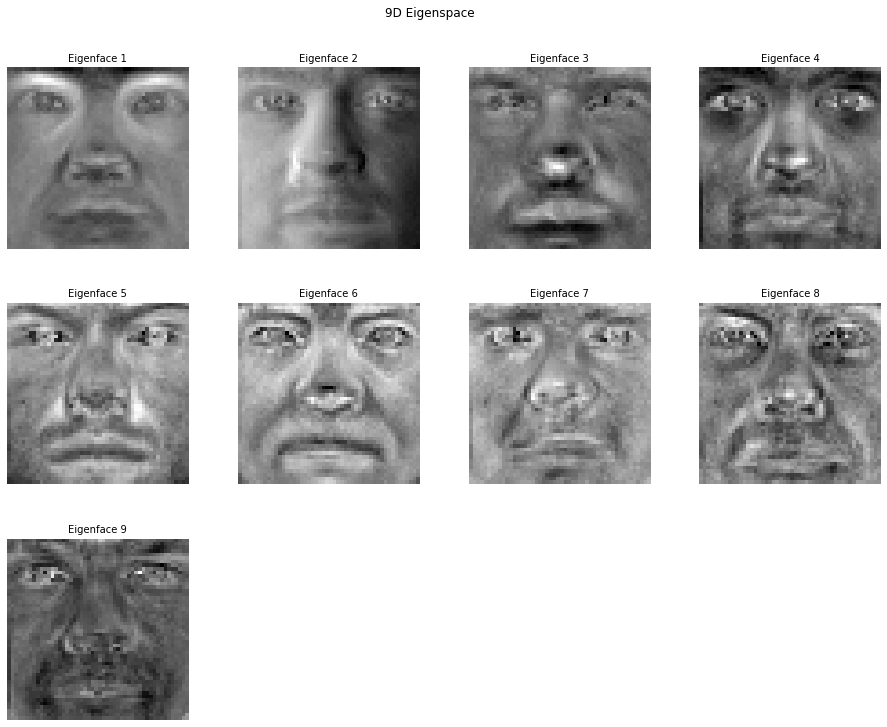

In [ ]:
eigenfaces = best_eigenspace_9d.get_eigenfaces()

showImages(eigenfaces, img_title = 'Eigenface', title = '9D Eigenspace', cols = 4)

Τα παρακάτω διαγράμματα παρουσιάζουν το ποσοστό της διακύμανσης που περιγράφει η κάθε συνιστώσα/*eigenface* ξεχωριστά και αθροιστικά. Παρατηρείται πως η διακύμανση **διαμοιράζεται** αρκετά στις διαφορετικές συνιστώσες και πως η συνολική διακύμανση φτάνει κοντά στο *90%* αλλά δεν το ξεπερνά. Οπότε χρειάζονται περισσότερες συνιστώσες ώστε η διακύμανση που περιγράφεται να φτάσει το *100%*. Παρόλα αυτά απόδοση κοντά 90% αποτελεί **εμπειρικά μια καλή ένδειξη** περιγραφής της **συνολικής διακύμανσης**

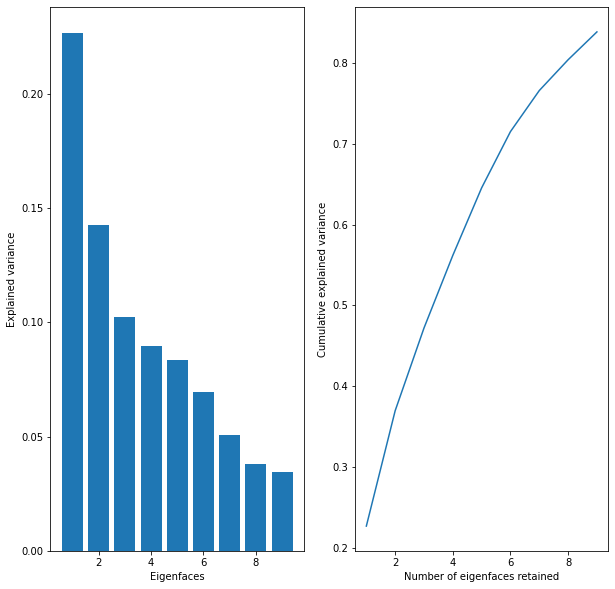

In [ ]:
best_eigenspace_9d.show_eigenstats()

Επιπλέον απεικονίζονται και τα *eigenfaces* που προκύπτουν από τον ιδιοχώρο με διάσταση d = 9 αλλά **χωρίς προεπεξεργασία** των δεδομένων. Σε μερικά *eiganfaces* παρατηρούνται ομοιότητες με κάποια από τα παραπάνω αλλά υπάρχουν και κάποια αρκετά διαφορετικά 

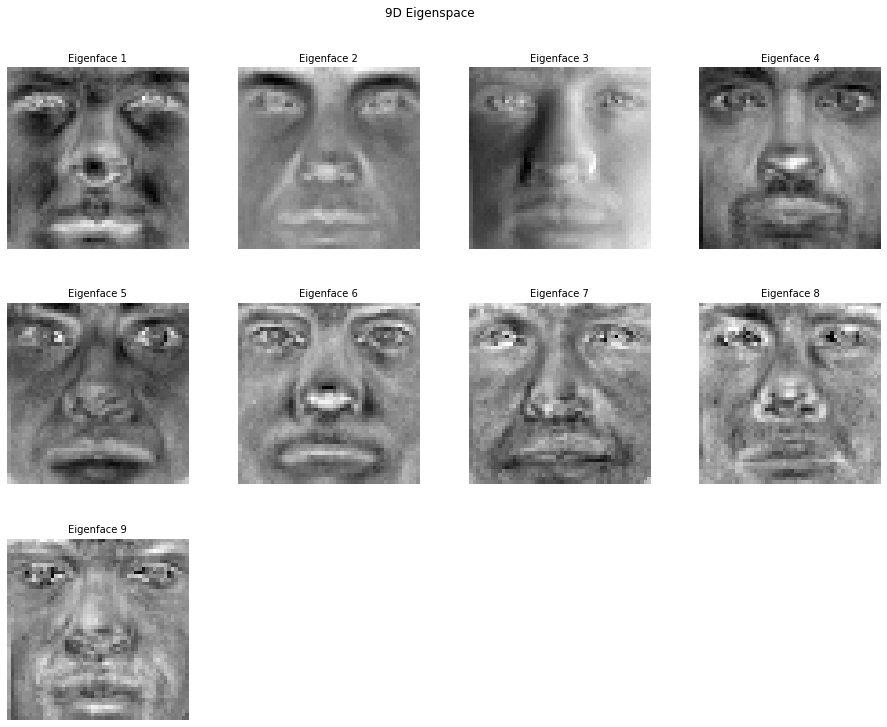

In [ ]:
eigenspace = EigenSpace(num_eigenfaces = 9, preprocessing_method = None).fit(training_set[0])
eigenfaces = eigenspace.get_eigenfaces()

showImages(eigenfaces, img_title = 'Eigenface', title = '9D Eigenspace', cols = 4)

Αυτό που αξίζει να επισημανθεί είναι πως στην περίπτωση αυτή σχεδόν **το μεγαλύτερο μέρος της διακύμανσης** των δεδομένων περιγράφεται **από την πρώτη συνιστώσα/*eigenface*** και δεν διαμοιράζεται με τον ίδιο τρόπο όπως προηγουμένως. Επιπλέον φαίνεται πως η συνολική διακύμανση ξεπερνά το *90%*. Παρόλα αυτά τα αποτελέσματα κατά την χρήση του στην **ταξινόμηση** ήταν αρκετά **χειρότερα** σε σύγκριση με τον ταξινομητή που χρησιμοποιήσε τον ιδιοχώρο που αναλύθηκε ακριβώς προηγουμένως

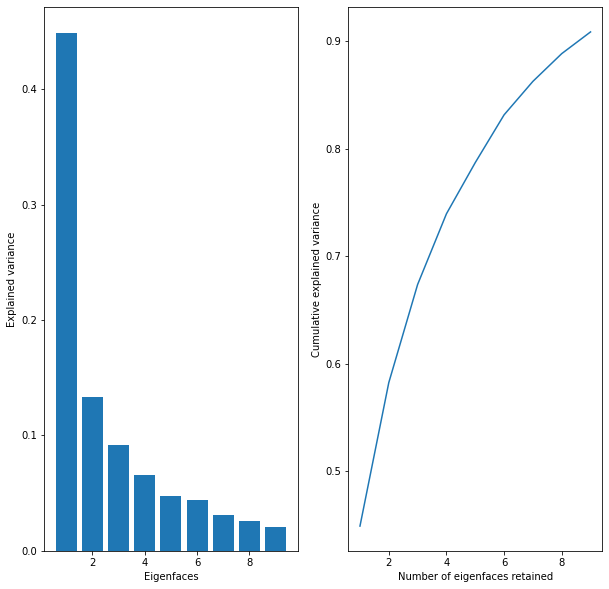

In [ ]:
eigenspace.show_eigenstats()

Τέλος παρουσιάζεται και το **μέσο πρόσωπο** του συνόλου εκπαίδευσης το οποίο αφαιρέθηκε από κάθε εικόνα για την δημιουργία των παραπάνω *eigenfaces*

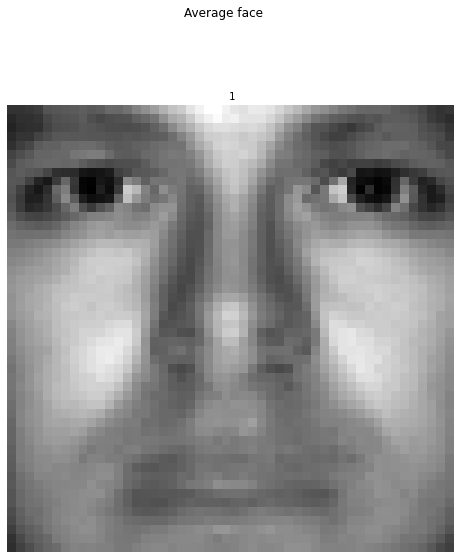

In [ ]:
showImages(best_eigenspace_9d.eigenspace_projector.feature_means.reshape(-1, 1), title = 'Average face', fig_size = (8, 10))

δ) *Να χρησιμοποιήσετε d = 9 και d = 30 Eigenfaces που βρήκατε από το Set_1, για να
ανακατασκευάσετε μια τυχαία εικόνα από κάθε ένα από τα 5 Sets. Να απεικονίσετε τόσο
τις αρχικές εικόνες όσο και τις ανακατασκευασμένες της για διαφορετικές τιμές του d.
Να σχολιάσετε την ποιότητα ανακατασκευής κάθε εικόνας*

Αρχικά ορίζεται μια συνάρτηση για την **επιλογή μιας τυχαίας εικόνας** από το κάθε σύνολο ανάλογα με κάποια γεννήτρια τυχαίων ακέραιων αριθμών η οποία χρησιμοποιεί ως φύτρα (seed) τον αριθμό μητρώου. Στο τέλος οι φωτογραφίες που επιλέχθηκαν τοποθετούνται ξανά σε έναν νέο πίνακα ως στήλες 

In [ ]:
def randomImagePicker(img_sets):
  selected_images = []
  for i, img_set in enumerate(img_sets):
    images = img_set[0]
    img_num = np.random.randint(images.shape[1])
    image = images[:, img_num]
    selected_images.append(image)

  return np.column_stack(selected_images)

In [ ]:
seed = int('1115201700175'[-4]) # Last 4 digits of my student id
np.random.seed(seed)

selected_faces = randomImagePicker(all_sets)

Στο παρακάτω πλέγμα εμφανίζονται σε **κάθε σειρά** και δίπλα-δίπλα οι εικόνες που αναφέρονται σε ένα **συγκεκριμένο πρόσωπο** που επιλέχθηκε από το αντίστοιχο σύνολο. Πιο συγκεκριμένα στην **πρώτη στήλη** (εικόνες με αριθμό 1) εμφανίζονται οι **αρχικές εικόνες**, στη **δεύτερη στήλη** (εικόνες με αριθμό 2) εμφανίζονται οι **ανακατασκευασμένες εικόνες** μετά από την προβολή τους στον **ιδιοχώρο με διάσταση d = 30** και στη **τρίτη στήλη** (εικόνες με αριθμό 3) εμφανίζονται οι **ανακατασκευασμένες εικόνες** μετά από την προβολή τους στον **ιδιοχώρο με διάσταση d = 9**. Έτσι μπορούν να γίνουν οι εξής παρατηρήσεις:

-  ***Παρατηρήσεις από το σύνολο 1:*** Κατά την προβολή στο χώρο που κατασκευάστηκε από το σύνολο εκπαίδευσης, μιας εικόνας που επιλέχθηκε από το **ίδιο το σύνολο εκπαίδευσης** οι ανακατασκευασμένες εικόνες που προκύπτουν έχουν **αρκετά καλή ποιότητα** (μέχρι και στον φωτεισμό) ακόμα και αν η διάσταση του νέου χώρου είναι μικρή όπως για d = 9. Πρακτικά η **βελτίωση** στην ποιότητα παρατηρείται ολοένα και περισσότερο **όσο η διάσταση πλησιάζει την τιμή d = 70** (και πιο συγκεκριμένα d = 69 αφού τα δεδομένα είναι κεντραρισμένα) που αποτελεί το *rank* του πίνακα όπου τότε η ανακατασκευή θα είναι τέλεια με μηδενικό σφάλμα

- ***Παρατηρήσεις από το σύνολο 2:*** Κατά την προβολή στο χώρο που κατασκευάστηκε από το σύνολο εκπαίδευσης, μιας εικόνας που επιλέχθηκε από σύνολο το οποίο παρουσιάζει **ελάχιστες διαφορές** ως προς το επίπεδο φωτεινότητας από το **σύνολο εκπαίδευσης** οι ανακατασκευασμένες εικόνες που προκύπτουν έχουν **ικανοποιητική ποιότητα** ως προς τα χαρακτηριστικά του προσώπου ακόμα και αν η διάσταση του νέου χώρου είναι μικρή όπως για d = 9. Παρόλα αυτά **δεν επαναφέρεται** πλήρως η **φωτεινότητα**

- ***Παρατηρήσεις από το σύνολο 3:*** Κατά την προβολή στο χώρο που κατασκευάστηκε από το σύνολο εκπαίδευσης, μιας εικόνας που επιλέχθηκε από σύνολο το οποίο αρχίζει να παρουσιάζει **αρκετές διαφορές** ως προς το επίπεδο φωτεινότητας σε σχέση με το **σύνολο εκπαίδευσης** οι ανακατασκευασμένες εικόνες που προκύπτουν παρουσιάζουν σχετικά **καλή ποιότητα** ως προς τα χαρακτηριστικά του προσώπου **μόνο** για τις **μεγαλύτερες διαστάσεις** όπως d = 30. Φαίνεται δηλαδή πως μερικά παραπάνω **νέα χαρακτηριστικά** αρκούν για να αντιμετωπιστεί σχετικός **θόρυβος** (όπως σκιές) σε διάφορα σημεία της εικόνας. Παρόλα αυτά **δεν επαναφέρεται** και σε αυτή τη περίπτωση η ακριβής **φωτεινότητα**

- ***Παρατηρήσεις από τα σύνολα 4 και 5:*** Κατά την προβολή στο χώρο που κατασκευάστηκε από το σύνολο εκπαίδευσης, μιας εικόνας που επιλέχθηκε από σύνολο το οποίο αρχίζει να παρουσιάζει **σημαντικές διαφορές** ως προς το επίπεδο φωτεινότητας σε σχέση με το **σύνολο εκπαίδευσης** οι ανακατασκευασμένες εικόνες που προκύπτουν παρουσιάζουν **μεγάλη απόκλιση** από τις πραγματικές εικόνες. Αυτό είναι αρκετά λογικό διότι όπως ανεφέρθηκε και παραπάνω τα **νέα χαρακτηριστικά** τα οποία προέκυψαν από το σύνολο εκπαίδευσης είναι **δύσκολο** να εντοπιστούν και να **περιγράψουν** ικανοποιητικά τις εικόνες αυτές λόγω της **υπερβολικά μεγάλης σκίασης** σε διάφορες περιοχές. Οπότε και για μικρές διαστάσεις όπως d = 9 αλλά και για μεγάλες όπως d = 30 είναι **αδύνατη** η επαναφορά των χαρακτηριστηκών των προσώπων των αρχικών εικόνων. Επίσης τα **τελικά χαρακτηριστικά** των προσώπων στις εικόνες που ανακατασκευάζονται στην ίδια διάσταση από τα **δύο τελευταία σύνολα** φαίνεται να **μη διαφέρουν** πολύ μεταξύ τους (και για d = 9 και για d = 30) παρόλο που αναφέρονται σε **διαφορετικά πρόσωπα** (και σε λίγο διαφορετικές φωτεινότητες). Φαίνεται δηλαδή πως οι προβολές εικόνων που δεν διακρίνονται επαρκώς να είναι πιθανώς πιο **κοντά** στον χώρο χαμηλότερης διάστασης αφού όπως διακρίνεται δίνουν **παρόμοια ανακατασκευή**. Προφανώς και σε αυτή τη περίπτωση η **φωτεινότητα δεν επαναφέρεται**

Συμπερασματικά η **ποιοτική ανακατασκευή των χαρακτηριστικών** των προσώπων από σύνολα ελέγχου που περιλαμβάνουν διαφορετικές εικόνες από αυτές του συνόλου εκπαίδευσης είναι **εφικτή και καλύτερη** κυρίως στις **μεγαλύτερες διαστάσεις** αλλά αν οι εικόνες αυτές παρουσιάζουν **μεγάλες διαφορές στην φωτεινότητα** από τις εικόνες εκπαίδευσης τότε **δεν είναι τόσο εφικτή**. Η **ποιοτική ανακατασκευή της φωτεινότητας** των προσώπων από σύνολα ελέγχου που περιλαμβάνουν διαφορετικές εικόνες από αυτές του συνόλου εκπαίδευσης δεν είναι σχεδόν **ποτέ εφικτή** πράγμα αρκετά λογικό μιας και δεν υπάρχουν **νέα χαρακτηριστικά** στον ιδιοχώρο τα οποία να περιγράφουν σημαντικές **αλλαγές στην φωτεινότητα**. Ο λόγος που δεν υπάρχουν νέα χαρακτηριστικά τα οποία να περιγράφουν τη πλήρη διακύμανση στη φωτεινότητα είναι πως όλες οι εικόνες του συνόλου εκπαίδευσης είναι αρκετά **φωτείνες** (πράγμα το οποίο καθιστά αρκετά δύσκολο να περιγραφούν πλήρως εικόνες διαφορετικών συνθηκών φωτεισμού). Η **διακύμανση στην φωτεινότητα** είναι αρκετά σημαντική στην αναγνώριση προσώπων διότι όπως αναγράφεται και στη βιβλιογραφία "οι διακυμάνσεις μεταξύ εικόνων του ίδιου προσώπου λόγω του φωτεισμού και των οπτικών γωνιών είναι σχεδόν πάντα πολύ μεγαλύτερες από τις διακυμάνσεις εικόνων που οφείλονται σε αλλαγές στην ταυτότητα των προσώπων" <br>
*The variations between the images of the same face due to illumination and viewing directions are almost always larger than image variations due to change in face identity ~ Y. Adini et al*

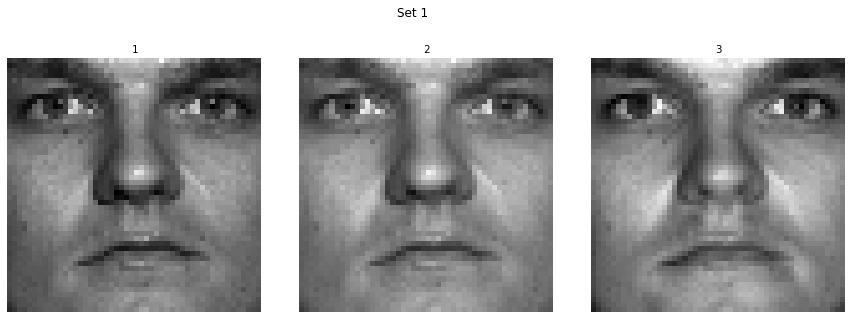

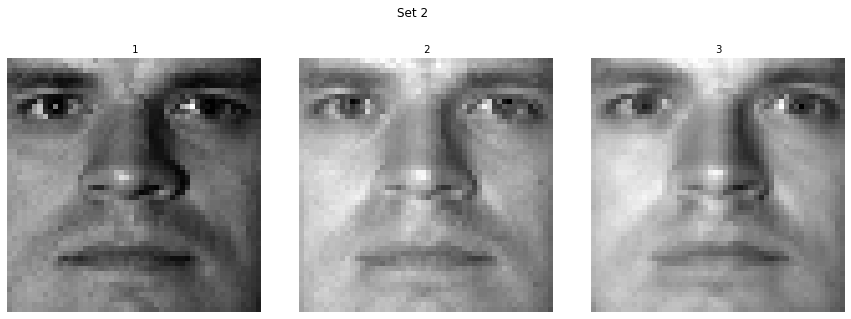

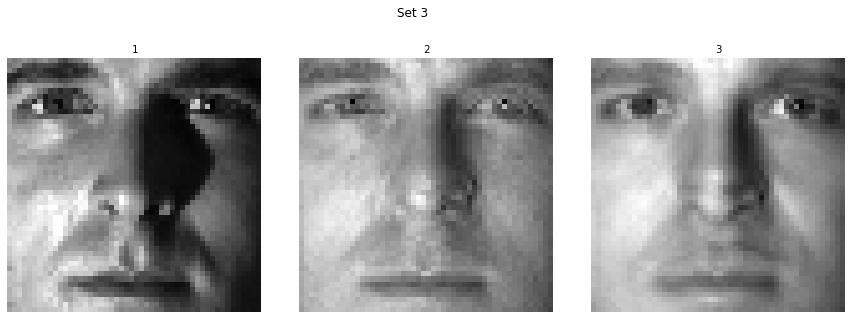

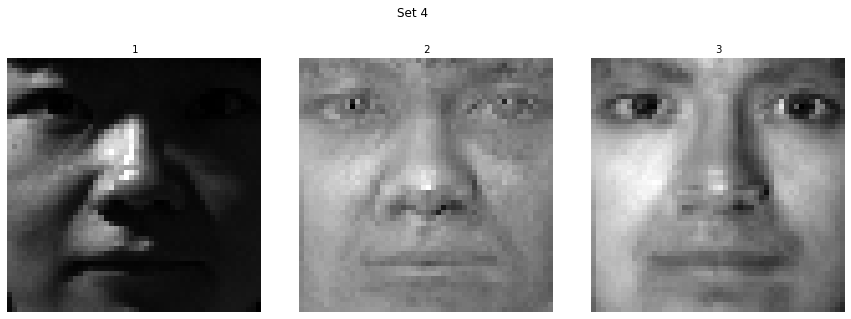

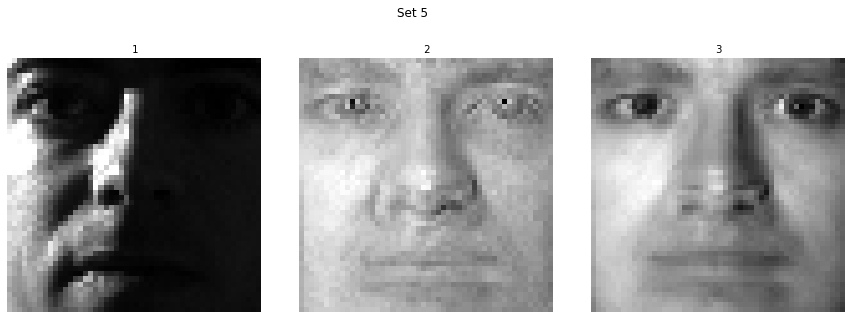

In [ ]:
reconstructed_faces_9d = best_eigenspace_9d.reconstruct_faces(selected_faces)
reconstructed_faces_30d = best_eigenspace_30d.reconstruct_faces(selected_faces)

for i, same_faces in enumerate(zip(selected_faces.T, reconstructed_faces_30d.T, reconstructed_faces_9d.T)):
   showImages(np.column_stack(same_faces), title = f'Set {i + 1}', title_distance = 0.75, fig_size = (15, 10))

ε) *Να απεικονίσετε τα 9 κύρια singular vectors που προκύπτουν αφού εφαρμόσετε SVD
στον πίνακα δεδομένων του Set_1. Διαφέρουν τα singular vectors από τα αντίστοιχα
ιδιοδιανύσματα; Αν ναι, γιατί;*

Αρχικά για την σύγκριση των 9 ιδιάζοντων διανυσμάτων (singular vectors) με τα αντίστοιχα 9 ιδιοδιανύσματα (eigenvectors/eigenfaces) θα χρειαστεί να γίνει **εξαγωγή χαρακτηρηστικών μέσω *SVD***. Επιπλέον χρησιμοποιείται η μέθοδος *TruncatedSVD* για την επιλογή των 9 κυρίων **ιδιάζοντων διανυσμάτων** που αποτελούν τη βάση του νέου χώρου 9 διαστάσεων. Η μέθοδος *TruncatedSVD* εκτελείται με **δύο** διαφορετικά **σύνολα εισόδου** όπου το πρώτο είναι το **σύνολο εκπαίδευσης ως έχει** και το δεύτερο το **σύνολο εκπαίδευσης** στο οποίο έχει **αφαιρεθεί η μέση τιμή** των εικόνων. Και στις δύο περιπτώσεις εφαρμόζεται η **ίδια αρχική προεπεξεργασία** στο σύνολο εκπαίδευσης που εφαρμόστηκε για την δημιουργία των ιδιοδιανυσμάτων. Επλιπλέον εκτός από την **απεικόνιση** των ιδιάζοντων διανυσμάτων εκτυπώνονται **μερικές τιμές** τους. Ταυτόχρονα **απεικονίζονται** ξανά τα **ιδιοδιανύσματα** και εκτυπώνονται επίσης **μερικές τιμές** τους. <br>
Αυτό που παρατηρείται από την εκτύπωση των τιμών είναι πως τα **ιδιάζοντα διανύσματα** τα οποία προέκυψαν από τον **πίνακα του συνόλου εκπαίδευσης ο οποίος δεν είναι κεντραρισμένος** είναι **διαφορετικά** από τα αντίστοιχα **ιδιοδιανύσματα**. Όμως τα **ιδιάζοντα διανύσματα** που προέκυψαν από τον **κεντραρισμένο πίνακα του συνόλου εκπαίδευσης** είναι **ακριβώς τα ίδια κατά απόλυτη τιμή** με τα αντίστοιχα **ιδιοδιανύσματα** και άρα δημιουργούν την **ίδια βάση** (η αυθαίρετη αλλαγή των προσήμων μεταξύ των διανυσμάτων που εξάγονται από τους διαφορετικούς αλγορίθμους δεν οδηγεί σε διαφορετικές βάσεις). Αυτή είναι και η αναμενόμενη συμπεριφορά μιας και όπως είναι γνωστό η **μέθοδος *SVD* είναι ισοδύναμη με την μέθοδο *PCA* μόνο όταν ο πίνακας εισόδου είναι κεντραρισμένος** <br>

**Απόδειξη**

Αρχικά γίνεται η υπόθεση πως ο πίνακας των δεδομένων εκπαιδευσης $\mathbf{X}$ $\in \mathbb{R}^{m \times n}$ είναι κεντραρισμένος δηλαδή από κάθε δείγμα $\mathbf{x}_i$ έχει αφαιρεθεί η μέση τιμή όλων των δειγμάτων. Όπως είναι γνωστό η λύση της *PCA* βασίζεται στην μεγιστοποίηση της διακύμανσης οπότε θα πρέπει να επιλεγούν τα ιδιοδιανύσματα τα οποία αντιστοιχούν στις $k$ μεγαλύτερες ιδιοτιμές του πίνακα $\frac{1}{n}\mathbf{XX}^T$ <br>

Δηλαδή θα πρέπει να υπολογιστούν οι πίνακες $\mathbf{W}_k$ και $\mathbf{D}_k$ έτσι ώστε:

$$\frac{1}{n}\mathbf{XX}^T\mathbf{W}_k = \mathbf{W}_k \mathbf{D}_k \tag{1}$$<br>
όπου $\mathbf{W}_k$ ο πίνακας διάστασης $m \times k$ με τα $k$ ιδιοδιανύσματα στις στήλες του που αντιστοιχούν στις μεγαλύτερες ιδιοτιμές και $\mathbf{D}_k$ ο πίνακας διάστασης $k \times k$ με τις $k$ μεγαλύτερες ιδιοτιμές στην διαγώνιο του <br><br>
Αφού από υπόθεση ο πίνακας των δεδομένων εκπαιδευσης $\mathbf{X}$ είναι κεντραρισμένος τότε ισχύει πως 
$\mathbf{C} = \frac{1}{n} \mathbf{XX}^T$ όπου ο πίνακας $\mathbf{C}$ διάστασης $m \times m$ είναι ο πίνακας συνδιακύμανσης<br> <br>
Άρα η $(1)$ να γραφτεί ως εξής:<br>

$$\mathbf{C}\mathbf{W}_k = \mathbf{W}_k \mathbf{D}_k \tag{2}$$<br>
Από τη μέθοδο *SVD* η αποσύνθεση του πίνακα  $\mathbf{X}$ προκύπτει ως εξής: 

$$\mathbf{X} = \mathbf{U} \mathbf{Σ} \mathbf{V}^Τ \tag{3}$$

όπου $\mathbf{V}$ είναι τα δεξία ιδιάζοντα διανύσματα, $\mathbf{U}$ είναι τα αριστερά ιδιάζοντα διανύσματα και $\mathbf{Σ}$ ο διαγώνιος πίνακας με τις ιδιάζουσες τιμές του πίνακα $\mathbf{X}$<br><br>

Δημιουργείται στην συνέχεια  ο πίνακας συνδιακύμανσης με τον εξής τρόπο:

$$ \mathbf{C} = \frac{1}{n}\mathbf{XΧ}^Τ =\frac{1}{n}(\mathbf{U}\mathbf{Σ}\mathbf{V}^T)(\mathbf{U}\mathbf{Σ}\mathbf{V}^T)^T
= \frac{1}{n}(\mathbf{U}\mathbf{Σ}\mathbf{V}^T)(\mathbf{V}\mathbf{Σ}\mathbf{U}^T) = \frac{1}{n}\mathbf{U}\mathbf{Σ}^2\mathbf{U}^T \tag{4}$$

αφού $\mathbf{VV}^T = \mathbf{I}$ μιας και τα δεξιά ιδιάζοντα διανύσματα αποτελούν ορθοκανονική βάση <br><br>

Επιλέγοντας τα $k$ ιδιάζοντα διανύσματα που αντιστιχούν στις $k$ μεγαλύτερες ιδιάζοντες τιμές (truncated svd) προκύπτει:

$$
\begin{align*}
&\mathbf{C} = \frac{1}{n}\mathbf{U}_k \mathbf{Σ}^2_k \mathbf{U}_k^T ⇒ \\~ \\
&\mathbf{C}\mathbf{U}_k = \frac{1}{n}\mathbf{U}_k \mathbf{Σ}^2_k \tag{5}
\end{align*}
$$<br>

Οπότε θέτοντας στην $(2)$ $\textbf{W}_k = \textbf{U}_k$ και $\textbf{D}_k = \frac{1}{n}\textbf{Σ}^2_k$ προκύπτει μια λύση για το *PCA* μέσω (truncated) *SVD*





Eigenvectors (eigenfaces)
[[-0.02766214  0.01810798  0.03630025 ...  0.02203415 -0.00558421
   0.00433926]
 [-0.0295858   0.01365107  0.02255663 ...  0.02572953  0.02801955
  -0.00136271]
 [-0.03566549  0.00913339  0.02522777 ...  0.04482983  0.0337603
   0.00666988]
 ...
 [ 0.00065683 -0.03336797 -0.00787173 ...  0.00754546  0.01387639
   0.01742057]
 [-0.00546072 -0.0357785  -0.00102041 ...  0.01835841  0.01091476
   0.04634133]
 [-0.00279816 -0.03758434 -0.00786547 ...  0.02590376  0.01181228
   0.05054961]]
--------------------------------------------------------------------------------
Singular vectors of SVD
[[-0.03636842 -0.02822441 -0.01817649 ... -0.02601027  0.02181826
   0.00424789]
 [-0.03654541 -0.03018412 -0.01373492 ... -0.00501805  0.02555648
  -0.02927108]
 [-0.03531635 -0.03626795 -0.00922437 ... -0.00585701  0.0446969
  -0.03467177]
 ...
 [-0.02084395  0.00021871  0.03328254 ... -0.0180565   0.00756061
  -0.01381356]
 [-0.02787873 -0.00603449  0.03566883 ... -0.02213

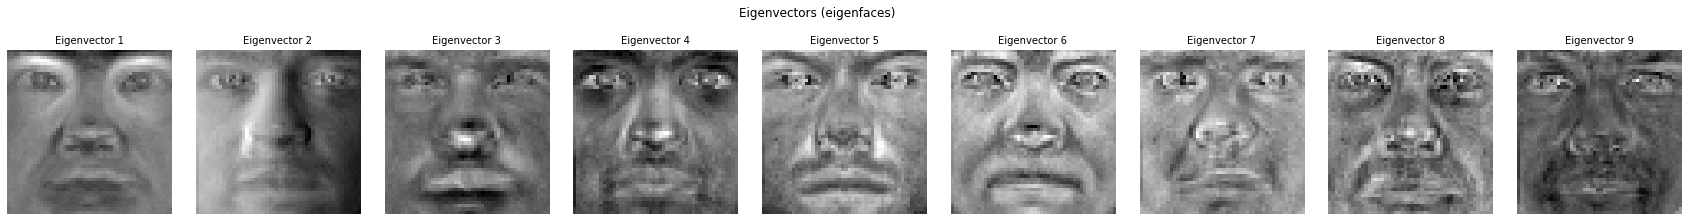

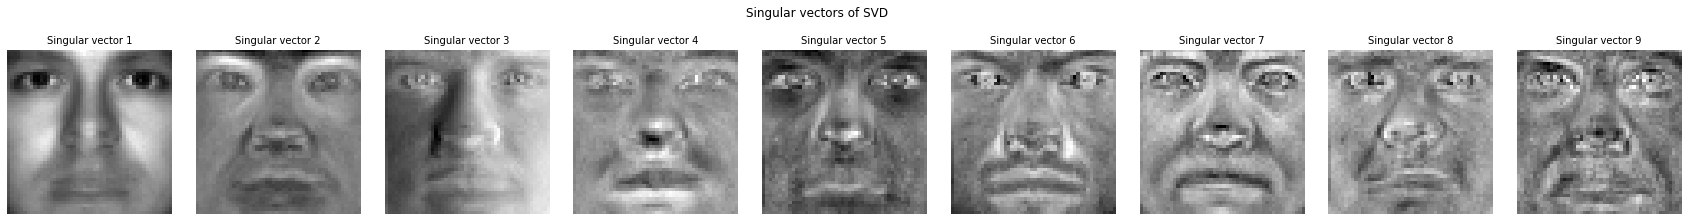

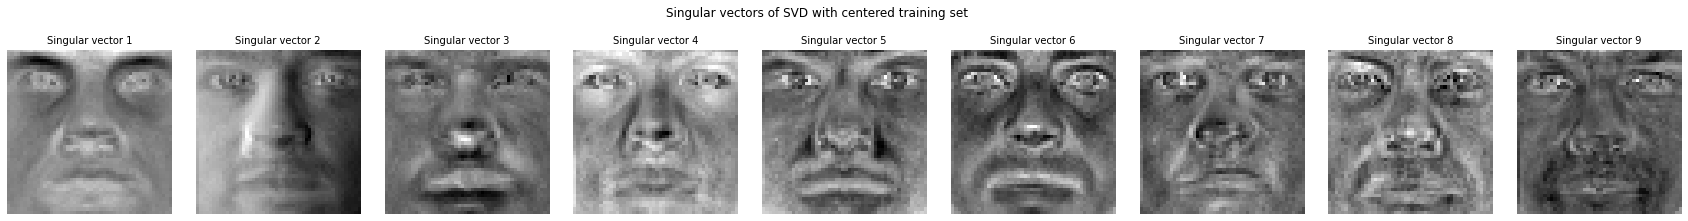

In [ ]:
print('Eigenvectors (eigenfaces)')
eigenfaces = best_eigenspace_9d.get_eigenfaces()
print(eigenfaces)
print('-' * 80)

X_train = StandardScaler(axis = 0).fit(training_set[0]).transform(training_set[0]) # Preprocessing of training set with the same preprocessing method as the 9d eigenspace

print('Singular vectors of SVD')
svd = TruncatedSVD(num_components = 9).fit(X_train)
print(svd.components)
print('-' * 80)

print('Singular vectors of SVD with centered training set')
centered_X_train = StandardScaler(axis = 1, with_std = False).fit(X_train).transform(X_train) # Mean removal
centered_svd = TruncatedSVD(num_components = 9).fit(centered_X_train)
print(centered_svd.components)
print('-' * 80)

showImages(eigenfaces, img_title = 'Eigenvector', title = 'Eigenvectors (eigenfaces)', fig_size = (30, 5), title_distance = 0.85, cols = 9)
showImages(svd.components, img_title = 'Singular vector', title = 'Singular vectors of SVD', fig_size = (30, 5), title_distance = 0.85, cols = 9)
showImages(centered_svd.components, img_title = 'Singular vector', title = 'Singular vectors of SVD with centered training set', fig_size = (30, 5), title_distance = 0.85, cols = 9)

Κλείνοντας παρατηρείται πως τα απεικονιζόμενα **ιδιοδιανύσματα** (1η γραμμή) είναι **ακριβώς τα ίδια** με τα απεικονιζόμενα **ιδιάζοντα διανύσματα** που προέκυψαν από το **κεντράρισμα του πίνακα εισόδου** (3η γραμμή) με κάποιες διαφορές στις αποχρώσεις λόγω των διαφορετικών προσήμων που εξηγήγαγαν ως λύση οι διαφορετικοί αλγόριθμοι. Τα **ιδιάζοντα διανύσματα** που προέκυψαν **χωρίς κεντράρισμα του πίνακα εισόδου** (2η γραμμή) φαίνεται να είναι και εκείνα **παρόμοια** με αυτά των άλλων δύο περιπτώσεων αν αφαιρεθεί το πρώτο ιδιάζον διάνυσμα. Αυτό που παρατηρείται επιπλέον είναι πως το **πρώτο ιδιάζον διάνυσμα της δεύτερης γραμμής** μοιάζει αρκετά με το **μέσο πρόσωπο** που απεικονίστηκε παραπάνω και αυτό πιθανώς να οφείλεται στο γεγονός πως εξαρχής **δεν είχε αφαιρεθεί** από τις εικόνες